# Table of Contents:
* [I: Tool Selection and Project Description](#tool_selection)
* [II.A: Data Exploration and Preparation](#exploration)
* [II.B: Contingency Tables and Significance](#contingency_tables)
* [III.A: Data Analysis](#analysis)
* [III.B: Logistic Regression](#regression)
* [IV: Conclusions](#conclusions)

# <a name = "tool_selection"></a>Tool Selection and Project Description

The goal of this data mining and analysis project is to examine customer attrition patterns and to determine what indicators can be used to make better business decisions to prevent loss. Furthermore, a model will be produced in order to predict whether or not a given customer might discontinue business based on a model built from this analysis.

This project will be done in Python using the various libraries in the scientific Python ecosystem of scikit-learn with a few other libraries for various uses. Specifically, this involves using pandas for data wrangling, manipulation, and cleaning, matplotlib and Seaborn for data visualization, and scikit-learn itself for model creation and analysis.


Like R and unlike SAS, all of these are easily available, free, and open-source. These methods have been chosen over R for ease of explanation, as Python code is often understood more readily than R, and because of the potential of integrating this project directly into a program or software for future use. While R is highly specialized for statistics and mathematics, Python is a general-purpose programming language with specialized libraries for the needed tools, and this facilitates project expansion in the future.

# <a name = "exploration"></a>Data Exploration and Preparation

|&emsp;|&emsp;|
|---|---|
|[CustomerID](#id_exploration)|[Gender](#gender_exploration)|
|[SeniorCitizen](#senior_exploration)|[Partner](#partner_exploration)|
|[Dependents](#dependents_exploration)|[Tenure](#tenure_exploration)|
|[PhoneService](#phone_exploration)|[MultipleLines](#lines_exploration)|
|[InternetService](#internet_exploration)|[OnlineSecurity](#security_exploration)|
|[OnlineBackup](#backup_exploration)|[DeviceProtection](#protection_exploration)|
|[TechSupport](#support_exploration)|[StreamingTV](#TV_exploration)|
|[StreamingMovies](#movies_exploration)|[Contract](#contract_exploration)|
|[PaperlessBilling](#paperless_exploration)|[PaymentMethod](#payment_exploration)|
|[MonthlyCharges](#monthly_exploration)|[TotalCharges](#total_exploration)|
|[Churn](#churn_exploration)|
|[Outlier Detection](#outliers)|

In [1]:
# Import all modules and libraries, as well as set matplotlib plotting to occur in the notebook.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scs
import prince
import pickle
from sklearn import preprocessing

%matplotlib inline

This dataset has 21 columns, with a number of which may be useful for predicting attrition, which is represented by the final column "Churn." Furthermore, it appears that none of the values are missing, or more specifically, NaN, but there is still potential for outliers or incorrect data.

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [3]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [4]:
for col in df.columns.values:
    print(col + ": " + str(df[col].isnull().values.any()))

customerID: False
gender: False
SeniorCitizen: False
Partner: False
Dependents: False
tenure: False
PhoneService: False
MultipleLines: False
InternetService: False
OnlineSecurity: False
OnlineBackup: False
DeviceProtection: False
TechSupport: False
StreamingTV: False
StreamingMovies: False
Contract: False
PaperlessBilling: False
PaymentMethod: False
MonthlyCharges: False
TotalCharges: False
Churn: False


In [5]:
n_rows = len(df)
n_rows

7043

<a name = "id_exploration"></a>
The column customerID appears to be a structured string simply used for identifying customers. It isn't relevant to this exploratory data analysis, so it will be dropped.

In [6]:
df.drop('customerID', axis = 1, inplace = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), object(17)
memory usage: 1.1+ MB


[Return](#exploration)

<a name = "gender_exploration"></a>
gender is a binary column and has a nearly perfect split between the values. 50.48% of customers are male and the remaining 49.52% are female. To make everything consistant, the column title will be updated.

In [8]:
df = df.rename(columns = {"gender": "Gender"})

In [9]:
df['Gender'].value_counts()

Male      3555
Female    3488
Name: Gender, dtype: int64

In [10]:
df['Gender'].value_counts(normalize = True)

Male      0.504756
Female    0.495244
Name: Gender, dtype: float64

[Return](#exploration)

<a name = "senior_exploration"></a>
SeniorCitizen appears to be a boolean value indicating whether or not the row corresponds to a customer that is a senior citizen, but what exact age that represents is unknown. 16.21% of customers are senior citizens in this dataset. This is the first example of a boolean column in this dataset, and they overall fail to follow a single convention. The boolean-like object columns will all be changed to an actual bool dtype as they come up.

In [11]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype('bool')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
Gender              7043 non-null object
SeniorCitizen       7043 non-null bool
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: bool(1), float64(1), int64(1), object(17)
memory usage: 1.0+ MB


In [12]:
df['SeniorCitizen'].value_counts()

False    5901
True     1142
Name: SeniorCitizen, dtype: int64

In [13]:
df['SeniorCitizen'].value_counts(normalize = True)

False    0.837853
True     0.162147
Name: SeniorCitizen, dtype: float64

[Return](#exploration)

<a name = "partner_exploration"></a>
The Partner column may relate to a business partnership or some similar idea, but its position in between age related columns and dependants when the columns seem ordered by topic lead the belief of it indicating the existance of a spouse or established relationship partner instead in boolean form. 48.3% of customers in this dataset have a partner. It is another column that needs changed to the bool dtype.

In [14]:
df['Partner'] = df['Partner'].replace({"No":False, "Yes":True})

In [15]:
df['Partner'] = df['Partner'].astype('bool')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
Gender              7043 non-null object
SeniorCitizen       7043 non-null bool
Partner             7043 non-null bool
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: bool(2), float64(1), int64(1), object(16)
memory usage: 1004.3+ KB


In [16]:
df['Partner'].value_counts()

False    3641
True     3402
Name: Partner, dtype: int64

In [17]:
df['Partner'].value_counts(normalize = True)

False    0.516967
True     0.483033
Name: Partner, dtype: float64

[Return](#exploration)

<a name = "dependents_exploration"></a>
Likewise, the Dependents column appears to be a boolean value of whether children or other legal dependents exist under the customer a given row represents that also needs converted to bool. 29.96% of customers in this dataset have dependents.

In [18]:
df['Dependents'] = df['Dependents'].replace({"No":False, "Yes":True})
df['Dependents'] = df['Dependents'].astype('bool')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
Gender              7043 non-null object
SeniorCitizen       7043 non-null bool
Partner             7043 non-null bool
Dependents          7043 non-null bool
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: bool(3), float64(1), int64(1), object(15)
memory usage: 956.2+ KB


In [19]:
df['Dependents'].value_counts()

False    4933
True     2110
Name: Dependents, dtype: int64

In [20]:
df['Dependents'].value_counts(normalize = True)

False    0.700412
True     0.299588
Name: Dependents, dtype: float64

[Return](#exploration)

<a name = "tenure_exploration"></a>
The tenure column, whose name notably does not follow the column naming conventions, seems to be the business meaning of the term, or the number of years that the customer has been with the company. Interestingly, the numbers range from 0 to 72. The highest value, 72, is the second most common while 0, is the lowest value and the least common. To make everything consistant, the column title will be updated.

In [21]:
df = df.rename(columns = {"tenure": "Tenure"})

In [22]:
df['Tenure'].value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: Tenure, Length: 73, dtype: int64

[Return](#exploration)

<a name = "phone_exploration"></a>
PhoneServices is a boolean value indicating whether or not a customer is paying for phone service or not, with 90.32% of customers at this telecommunications company actively having a phone plan. Like others, it needs converted to the bool dtype.

In [23]:
df['PhoneService'] = df['PhoneService'].replace({"No":False, "Yes":True})
df['PhoneService'] = df['PhoneService'].astype('bool')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
Gender              7043 non-null object
SeniorCitizen       7043 non-null bool
Partner             7043 non-null bool
Dependents          7043 non-null bool
Tenure              7043 non-null int64
PhoneService        7043 non-null bool
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: bool(4), float64(1), int64(1), object(14)
memory usage: 908.0+ KB


In [24]:
df['PhoneService'].value_counts()

True     6361
False     682
Name: PhoneService, dtype: int64

In [25]:
df['PhoneService'].value_counts(normalize = True)

True     0.903166
False    0.096834
Name: PhoneService, dtype: float64

[Return](#exploration)

<a name = "lines_exploration"></a>
MultipleLines is a string value that indicates whether the given customer has multiple lines on their account, has only a single line on their account, or if this column isn't applicable for the customer, that they do not have phone service through this company. 42.18% of total customers in this dataset have multiple lines, and 46.71% of customers with phone service in this dataset have multiple lines.

In [26]:
df['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [27]:
n_multiple_lines = df['MultipleLines'].value_counts()[1]
lines_proportion = n_multiple_lines / n_rows
print("{0:.4f}".format(lines_proportion) + "%")

0.4218%


In [28]:
lines_proportion2 = n_multiple_lines / (n_rows - df['MultipleLines'].value_counts()[2])
print("{0:.4f}".format(lines_proportion2) + "%")

0.4671%


[Return](#exploration)

<a name = "internet_exploration"></a>
InternetService is a string value indicating whether or not a customer is paying for internet service or not, and whether or not this service is for a fiber optic plan or a DSL plan. 90.32% of customers in this data service have an internet plan. 43.96% and 34.37% of total customers in this dataset have a fiber or DSL plan respectively, and 56.12% and 43.88% of customers with internet service have fiber or DSL plans respectively.

Many of the columns in this dataset have a number of possibilities that signify whether or not a service is included in the given customer's plan. Many of these columns would be boolean, but have a third value indicating that they do not have the required service plan for it to be a possibility. While these may be converted into bool dtype columns for later analysis, the boolean-like yes and no values will be changed to True or False on this first pass.

In [29]:
df['InternetService'] = df['InternetService'].replace({"No":"False"})

In [30]:
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
False          1526
Name: InternetService, dtype: int64

In [31]:
n_internet = n_rows - df['InternetService'].value_counts()[2]
internet_proportion = n_internet / n_rows
print("{0:.4f}".format(internet_proportion) + "%")

0.7833%


In [32]:
n_fiber = df['InternetService'].value_counts()[0]
n_dsl = df['InternetService'].value_counts()[1]
fiber_proportion = n_fiber / n_rows
dsl_proportion = n_dsl / n_rows
print("Fiber: {0:.4f}".format(fiber_proportion) + "%\nDSL: {0:.4f}".format(dsl_proportion) + "%")

Fiber: 0.4396%
DSL: 0.3437%


In [33]:
fiber_proportion2 = n_fiber / n_internet
dsl_proportion2 = n_dsl / n_internet
print("Fiber: {0:.4f}".format(fiber_proportion2) + "%\nDSL: {0:.4f}".format(dsl_proportion2) + "%")

Fiber: 0.5612%
DSL: 0.4388%


[Return](#exploration)

<a name = "security_exploration"></a>
OnlineSecurity is a string value that indicates whether the given customer has an online security package in addition to their internet service, did not opt for the online security package, or if this column isn't applicable for the customer, that they do not have internet service through this company. 28.67% of total customers in this dataset have the online security package, and 36.6% of customers with internet service in this dataset have the online security package. Its values will be updated to the more boolean-like format.

In [34]:
df['OnlineSecurity'] = df['OnlineSecurity'].replace({"No":"False", "Yes":"True"})

In [35]:
df['OnlineSecurity'].value_counts()

False                  3498
True                   2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [36]:
n_security = df['OnlineSecurity'].value_counts()[1]
security_proportion = n_security / n_rows
print("{0:.4f}".format(security_proportion) + "%")

0.2867%


In [37]:
security_proportion2 = n_security / (n_rows - df['OnlineSecurity'].value_counts()[2])
print("{0:.4f}".format(security_proportion2) + "%")

0.3660%


[Return](#exploration)

<a name = "backup_exploration"></a>
OnlineBackup is a string value that indicates whether the given customer has an online backup package in addition to their internet service, did not opt for the online backup package, or if this column isn't applicable for the customer, that they do not have internet service through this company. 34.49% of total customers in this dataset have the online security package, and 44.03% of customers with internet service in this dataset have the online security package. Its values will be updated to the more boolean-like format.

In [38]:
df['OnlineBackup'] = df['OnlineBackup'].replace({"No":"False", "Yes":"True"})

In [39]:
df['OnlineBackup'].value_counts()

False                  3088
True                   2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [40]:
n_backup = df['OnlineBackup'].value_counts()[1]
backup_proportion = n_backup / n_rows
print("{0:.4f}".format(backup_proportion) + "%")

0.3449%


In [41]:
backup_proportion2 = n_backup / (n_rows - df['OnlineBackup'].value_counts()[2])
print("{0:.4f}".format(backup_proportion2) + "%")

0.4403%


[Return](#exploration)

<a name = "protection_exploration"></a>
DeviceProtection is a string value that indicates whether the given customer has a device protection plan in addition to their internet service, did not opt for any protection plan, or if this column isn't applicable for the customer, that they do not have internet service through this company. 34.39% of total customers in this dataset have a device protection plan, and 43.90% of customers with internet service in this dataset have a device protection plan. Its values will be updated to the more boolean-like format.

In [42]:
df['DeviceProtection'] = df['DeviceProtection'].replace({"No":"False", "Yes":"True"})

In [43]:
df['DeviceProtection'].value_counts()

False                  3095
True                   2422
No internet service    1526
Name: DeviceProtection, dtype: int64

In [44]:
n_protection = df['DeviceProtection'].value_counts()[1]
protection_proportion = n_protection / n_rows
print("{0:.4f}".format(protection_proportion) + "%")

0.3439%


In [45]:
protection_proportion2 = n_protection / (n_rows - df['DeviceProtection'].value_counts()[2])
print("{0:.4f}".format(protection_proportion2) + "%")

0.4390%


OnlineBackup and DeviceProtection appear to be the first potential major issue for future analysis. Both require that the customer have a value other than no in the InternetService column, and also have extremely similar numbers, 2429 and 2422, 44.03% and 43.90% respectively. The correlation between the types of column values, namely the No internet service ones, are going to prevent proper testing and model building if tested together.

In [46]:
contingency_table = pd.crosstab(df['OnlineBackup'], df['DeviceProtection'])
contingency_table

DeviceProtection,False,No internet service,True
OnlineBackup,,,
False,1984,0,1104
No internet service,0,1526,0
True,1111,0,1318


As we will see shortly, a number of the columns require internet service to have meaningful values and are in the same situation as the above section, so the data will have to be restructured to account for this.

[Return](#exploration)

<a name = "support_exploration"></a>
TechSupport is a string value that indicates whether the given customer has a tech support package in addition to their internet service, did not opt for any tech support package, or if this column isn't applicable for the customer, that they do not have internet service through this company. 29.02% of total customers in this dataset have a tech support package, and 37.05% of customers with internet service in this dataset have a tech support package. Its values will be updated to the more boolean-like format.

In [47]:
df['TechSupport'] = df['TechSupport'].replace({"No":"False", "Yes":"True"})

In [48]:
df['TechSupport'].value_counts()

False                  3473
True                   2044
No internet service    1526
Name: TechSupport, dtype: int64

In [49]:
n_support = df['TechSupport'].value_counts()[1]
support_proportion = n_support / n_rows
print("{0:.4f}".format(support_proportion) + "%")

0.2902%


In [50]:
support_proportion2 = n_support / (n_rows - df['TechSupport'].value_counts()[2])
print("{0:.4f}".format(support_proportion2) + "%")

0.3705%


[Return](#exploration)

<a name = "TV_exploration"></a>
StreamingTV is a string value that indicates whether the given customer has a TV streaming package in addition to their internet service, did not opt for any TV streaming package, or if this column isn't applicable for the customer, that they do not have internet service through this company. 38.44% of total customers in this dataset have a TV streaming package, and 49.07% of customers with internet service in this dataset have a TV streaming package. Its values will be updated to the more boolean-like format.

In [51]:
df['StreamingTV'] = df['StreamingTV'].replace({"No":"False", "Yes":"True"})

In [52]:
df['StreamingTV'].value_counts()

False                  2810
True                   2707
No internet service    1526
Name: StreamingTV, dtype: int64

In [53]:
n_tv = df['StreamingTV'].value_counts()[1]
tv_proportion = n_tv / n_rows
print("{0:.4f}".format(tv_proportion) + "%")

0.3844%


In [54]:
tv_proportion2 = n_tv / (n_rows - df['StreamingTV'].value_counts()[2])
print("{0:.4f}".format(tv_proportion2) + "%")

0.4907%


[Return](#exploration)

<a name = "movies_exploration"></a>
StreamingMovies is a string value that indicates whether the given customer has a movie streaming package in addition to their internet service, did not opt for any movie streaming package, or if this column isn't applicable for the customer, that they do not have internet service through this company. 38.79% of total customers in this dataset have a movie streaming package, and 49.52% of customers with internet service in this dataset have a movie streaming package. Its values will be updated to the more boolean-like format.

In [55]:
df['StreamingMovies'] = df['StreamingMovies'].replace({"No":"False", "Yes":"True"})

In [56]:
df['StreamingMovies'].value_counts()

False                  2785
True                   2732
No internet service    1526
Name: StreamingMovies, dtype: int64

In [57]:
n_movie = df['StreamingMovies'].value_counts()[1]
movie_proportion = n_movie / n_rows
print("{0:.4f}".format(movie_proportion) + "%")

0.3879%


In [58]:
movie_proportion2 = n_movie / (n_rows - df['StreamingMovies'].value_counts()[2])
print("{0:.4f}".format(movie_proportion2) + "%")

0.4952%


[Return](#exploration)

<a name = "contract_exploration"></a>
Contract is a string value that indicates what type of contract the given customer is under. The contract type values include Month-to-month, One year, and two year. 55.02% of customers are under a month to month contract, 24.07% are under a single year contract, and the remaining 20.91% are under a two year contract.

In [59]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [60]:
df['Contract'].value_counts(normalize = True)

Month-to-month    0.550192
Two year          0.240664
One year          0.209144
Name: Contract, dtype: float64

[Return](#exploration)

<a name = "paperless_exploration"></a>
PaperlessBilling is a boolean value indicating whether or not the given customer has opted for paperless billing or not, with 59.22% of customers at this telecommunications company actively enrolled in paperless billing. As a true boolean column, it will be completely changed to the boolean dtype.

In [61]:
df['PaperlessBilling'] = df['PaperlessBilling'].replace({"No":False, "Yes":True})
df['PaperlessBilling'] = df['PaperlessBilling'].astype('bool')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
Gender              7043 non-null object
SeniorCitizen       7043 non-null bool
Partner             7043 non-null bool
Dependents          7043 non-null bool
Tenure              7043 non-null int64
PhoneService        7043 non-null bool
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null bool
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: bool(5), float64(1), int64(1), object(13)
memory usage: 859.9+ KB


In [62]:
df['PaperlessBilling'].value_counts()

True     4171
False    2872
Name: PaperlessBilling, dtype: int64

In [63]:
df['PaperlessBilling'].value_counts(normalize = True)

True     0.592219
False    0.407781
Name: PaperlessBilling, dtype: float64

[Return](#exploration)

<a name = "payment_exploration"></a>
PaymentMethod is a string value that indicates what type of payment method the given customer uses. The payment method values include electronic checks, traditional checks via mail, automatic bank transfer, and automatic payment with a credit card. 33.58% of customers pay via electronic check, 22.89% pay via mailed check, 21.92% pay automatically via bank transfer, and the remaining 21.61% pay automatically via credit card.

In [64]:
df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [65]:
df['PaymentMethod'].value_counts(normalize = True)

Electronic check             0.335794
Mailed check                 0.228880
Bank transfer (automatic)    0.219225
Credit card (automatic)      0.216101
Name: PaymentMethod, dtype: float64

[Return](#exploration)

<a name = "monthly_exploration"></a>
MonthlyCharges is a float value indicating the required monthly payment of a given customer. The mean value is 64.76, the mode value 20.05, the minimum 18.25, and the maximum value 118.75. This distribution is extremely skewed to the right.

In [66]:
df['MonthlyCharges'].value_counts()

20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
114.75     1
103.60     1
113.40     1
57.65      1
113.30     1
Name: MonthlyCharges, Length: 1585, dtype: int64

In [67]:
df['MonthlyCharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

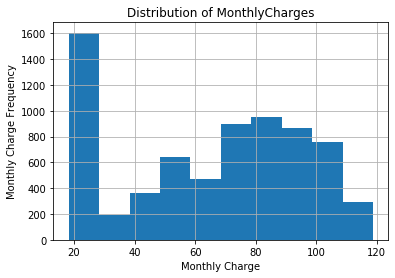

In [68]:
plt.hist(df['MonthlyCharges'])
plt.title('Distribution of MonthlyCharges')
plt.xlabel('Monthly Charge')
plt.ylabel('Monthly Charge Frequency')
plt.grid(True)
plt.show()

[Return](#exploration)

<a name = "total_exploration"></a>
TotalCharges appears to be a column that represents the total amount a given customer has paid throughout all transactions of the business-customer relationship. However, the column is loaded as the object dtype, or a string, instead of a float. This will have to be changed to examine the data effectively.

In [69]:
df['TotalCharges'].describe()

count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

These 11 rows have missing values for their TotalCharges column, but this appears to be the only missing columns. Notably, these customers' Tenure values are all 0, and none of them have churned. It seems likely that these customers don't have a TotalCharges value simply because they haven't been charged yet. As such, their TotalCharges value will be set to 0 to allow for later analysis.

In [70]:
df.loc[pd.to_numeric(df['TotalCharges'], errors='coerce').isnull()]

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,False,True,True,0,False,No phone service,DSL,True,False,True,True,True,False,Two year,True,Bank transfer (automatic),52.55,,No
753,Male,False,False,True,0,True,No,False,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,False,Mailed check,20.25,,No
936,Female,False,True,True,0,True,No,DSL,True,True,True,False,True,True,Two year,False,Mailed check,80.85,,No
1082,Male,False,True,True,0,True,Yes,False,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,False,Mailed check,25.75,,No
1340,Female,False,True,True,0,False,No phone service,DSL,True,True,True,True,True,False,Two year,False,Credit card (automatic),56.05,,No
3331,Male,False,True,True,0,True,No,False,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,False,Mailed check,19.85,,No
3826,Male,False,True,True,0,True,Yes,False,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,False,Mailed check,25.35,,No
4380,Female,False,True,True,0,True,No,False,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,False,Mailed check,20.00,,No
5218,Male,False,True,True,0,True,No,False,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,True,Mailed check,19.70,,No
6670,Female,False,True,True,0,True,Yes,DSL,False,True,True,True,True,False,Two year,False,Mailed check,73.35,,No


In [71]:
tofix = [488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]

df.loc[tofix, 'TotalCharges'] = 0

In [72]:
df.iloc[tofix]['TotalCharges']

488     0
753     0
936     0
1082    0
1340    0
3331    0
3826    0
4380    0
5218    0
6670    0
6754    0
Name: TotalCharges, dtype: object

Now we can change the column to the float dtype and then examine the data. The mean TotalCharges value is 2283.30, the minimum value is 18.80, and the maximum is 8684.80. Overall, the column is very right-skewed.

In [73]:
# Correct the TotalCharges column's dtype from object to float.
df['TotalCharges'] = df['TotalCharges'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
Gender              7043 non-null object
SeniorCitizen       7043 non-null bool
Partner             7043 non-null bool
Dependents          7043 non-null bool
Tenure              7043 non-null int64
PhoneService        7043 non-null bool
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null bool
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null object
dtypes: bool(5), float64(2), int64(1), object(12)
memory usage: 859.9+ KB


In [74]:
df['TotalCharges'].describe()

count    7043.000000
mean     2279.734304
std      2266.794470
min         0.000000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

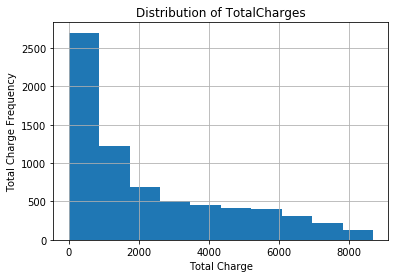

In [75]:
plt.hist(df['TotalCharges'])
plt.title('Distribution of TotalCharges')
plt.xlabel('Total Charge')
plt.ylabel('Total Charge Frequency')
plt.grid(True)
plt.show()

[Return](#exploration)

<a name = "churn_exploration"></a>
Finally, the last column of the dataset is the Churn column, which is a boolean value indicating on whether or not the customer has ceased business. 26.54% customers in this dataset have churned. As a true boolean column, it will be completely changed to the boolean dtype.

In [76]:
df['Churn'] = df['Churn'].replace({"No":False, "Yes":True})
df['Churn'] = df['Churn'].astype('bool')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
Gender              7043 non-null object
SeniorCitizen       7043 non-null bool
Partner             7043 non-null bool
Dependents          7043 non-null bool
Tenure              7043 non-null int64
PhoneService        7043 non-null bool
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null bool
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null bool
dtypes: bool(6), float64(2), int64(1), object(11)
memory usage: 811.7+ KB


In [77]:
df['Churn'].value_counts()

False    5174
True     1869
Name: Churn, dtype: int64

In [78]:
df['Churn'].value_counts(normalize = True)

False    0.73463
True     0.26537
Name: Churn, dtype: float64

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
Gender              7043 non-null object
SeniorCitizen       7043 non-null bool
Partner             7043 non-null bool
Dependents          7043 non-null bool
Tenure              7043 non-null int64
PhoneService        7043 non-null bool
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null bool
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null bool
dtypes: bool(6), float64(2), int64(1), object(11)
memory usage: 811.7+ KB


[Return](#exploration)

## <a name = "outliers"></a> Outlier Detection

In this dataset, the three continuous variable columns do not have any outliers. None are present based on IQR range, as seen on the boxplots, and none are present based on the z-score with a threshold of 3 standard deviations.

### Tenure

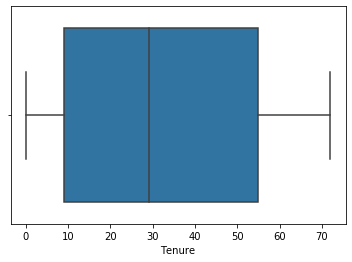

In [80]:
sns.boxplot(df['Tenure'])

In [81]:
tenure_z = np.abs(scs.zscore(df['Tenure']))
tenure_z

array([1.27744458, 0.06632742, 1.23672422, ..., 0.87024095, 1.15528349,
       1.36937906])

In [82]:
print(np.where(tenure_z > 3))

(array([], dtype=int64),)


### MonthlyCharges

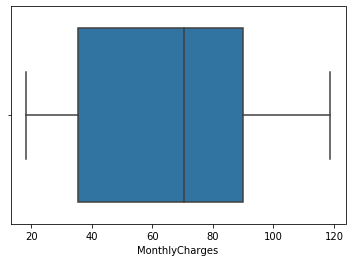

In [83]:
sns.boxplot(df['MonthlyCharges'])

In [84]:
monthly_z = np.abs(scs.zscore(df['MonthlyCharges']))
monthly_z

array([1.16032292, 0.25962894, 0.36266036, ..., 1.1686319 , 0.32033821,
       1.35896134])

In [85]:
print(np.where(monthly_z > 3))

(array([], dtype=int64),)


### TotalCharges

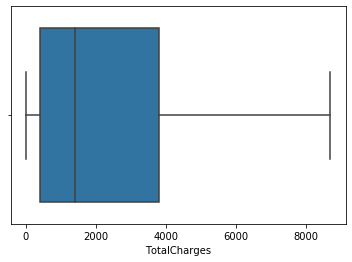

In [86]:
sns.boxplot(df['TotalCharges'])

In [87]:
total_z = np.abs(scs.zscore(df['TotalCharges']))
total_z

array([0.99261052, 0.17216471, 0.9580659 , ..., 0.85293201, 0.87051315,
       2.01389665])

In [88]:
print(np.where(total_z > 3))

(array([], dtype=int64),)


[Return](#exploration)

# <a name = "contingency_tables"></a> Contingency Tables and Significance

* [Dataframe Restructuring](#restructuring)
* [Univariate Distribution Visualization](#univariate_visualization)
* [Contingency Table Creation](#contingency_creation)
* [Continuous Variable Churn Distribution](#continuous_distribution)

Contingency tables will be calculated for all variables in order to see how they appear to affect the churn rate before using more intensive methods.

This is where the categorical variables become an issue for analyzing the data set. A number of these variables are inherently correlated with each other; e.g. MultipleLines with PhoneService, and OnlineSecurity with InternetService. To do meaningful tests of significance, this intercorrelation needs to be removed before the tests are run. Specifically, the problem is that the values of "no phone service" and "no internet service" are also factoring into the tests. There are a few approaches available in order deal with this.

The first is to split the dataframe into three distinct dataframes, one for cutomers with only phone service, one for customers with only internet service, and the last for customers with both phone and internet service through this company. This is less than ideal for several reasons. Rather than a single dataframe with single calculations, this would then create three dataframes and require three tests for each calculation, further complicating how all of the tests would be combined.

In [89]:
phone_count = df.query("PhoneService == True and InternetService == 'False'").shape[0]
phone_count

1526

In [90]:
internet_count = df.query("PhoneService == False and InternetService != 'False'").shape[0]
internet_count

682

In [91]:
both_count = df.query("PhoneService == True and InternetService != 'False'").shape[0]
both_count

4835

In [92]:
(phone_count + internet_count + both_count) == n_rows

True

The second option is to simply remove a subsection of the rows, effectively removing columns of data in the process. This would technically work but it would also remove a significant amount of information in the process.

The remaining option is to manipulate the encoding and representation of the data. The categories that these all involve can be split into multiple boolean columns representing the "positive" values of the original columns. As an example, the MultipleLines column would be changed to be a boolean True/False option, with all rows that do not have phone service also being represented as False. Ultimately, the multiple logistic regression model is only going to adjust the calculation with a parameter if the value is true, and to create the model, these dummy variables have to be created regardless.

## <a name = "restructuring"></a> Dataframe Restructuring

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
Gender              7043 non-null object
SeniorCitizen       7043 non-null bool
Partner             7043 non-null bool
Dependents          7043 non-null bool
Tenure              7043 non-null int64
PhoneService        7043 non-null bool
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null bool
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null bool
dtypes: bool(6), float64(2), int64(1), object(11)
memory usage: 811.7+ KB


In [94]:
original_df = df.copy(deep = True)

### Gender

In [95]:
df['Gender'].value_counts()

Male      3555
Female    3488
Name: Gender, dtype: int64

In [96]:
df['Gender'] = df['Gender'].replace({"Male":False, "Female":True})
df['Gender'] = df['Gender'].astype('bool')
df['Gender'].value_counts()

False    3555
True     3488
Name: Gender, dtype: int64

### MultipleLines

In [97]:
df['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [98]:
df.loc[df['MultipleLines'] == "No phone service", 'MultipleLines'] = np.NaN

In [99]:
df['MultipleLines'] = df['MultipleLines'].replace({"No":False, "Yes":True})
df['MultipleLines'] = df['MultipleLines'].fillna(False).astype('bool')
df['MultipleLines'].value_counts()

False    4072
True     2971
Name: MultipleLines, dtype: int64

### FiberOpticService

In [100]:
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
False          1526
Name: InternetService, dtype: int64

In [101]:
df['FiberOpticService'] = False

In [102]:
df.loc[df['InternetService'] == "Fiber optic", 'FiberOpticService'] = True

In [103]:
df['FiberOpticService'].value_counts()

False    3947
True     3096
Name: FiberOpticService, dtype: int64

### DSLService

In [104]:
df['DSLService'] = False

In [105]:
df.loc[df['InternetService'] == "DSL", 'DSLService'] = True

In [106]:
df['DSLService'].value_counts()

False    4622
True     2421
Name: DSLService, dtype: int64

In [107]:
df.drop('InternetService', axis = 1, inplace = True)

### OnlineSecurity

In [108]:
df['OnlineSecurity'].value_counts()

False                  3498
True                   2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [109]:
df.loc[df['OnlineSecurity'] == "No internet service", 'OnlineSecurity'] = np.NaN

In [110]:
df['OnlineSecurity'] = df['OnlineSecurity'].replace({"False":False, "True":True})
df['OnlineSecurity'] = df['OnlineSecurity'].fillna(False).astype('bool')
df['OnlineSecurity'].value_counts()

False    5024
True     2019
Name: OnlineSecurity, dtype: int64

### OnlineBackup

In [111]:
df['OnlineBackup'].value_counts()

False                  3088
True                   2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [112]:
df.loc[df['OnlineBackup'] == "No internet service", 'OnlineBackup'] = np.NaN

In [113]:
df['OnlineBackup'] = df['OnlineBackup'].replace({"False":False, "True":True})
df['OnlineBackup'] = df['OnlineBackup'].fillna(False).astype('bool')
df['OnlineBackup'].value_counts()

False    4614
True     2429
Name: OnlineBackup, dtype: int64

### DeviceProtection

In [114]:
df['DeviceProtection'].value_counts()

False                  3095
True                   2422
No internet service    1526
Name: DeviceProtection, dtype: int64

In [115]:
df.loc[df['DeviceProtection'] == "No internet service", 'DeviceProtection'] = np.NaN

In [116]:
df['DeviceProtection'] = df['DeviceProtection'].replace({"False":False, "True":True})
df['DeviceProtection'] = df['DeviceProtection'].fillna(False).astype('bool')
df['DeviceProtection'].value_counts()

False    4621
True     2422
Name: DeviceProtection, dtype: int64

### TechSupport

In [117]:
df['TechSupport'].value_counts()

False                  3473
True                   2044
No internet service    1526
Name: TechSupport, dtype: int64

In [118]:
df.loc[df['TechSupport'] == "No internet service", 'TechSupport'] = np.NaN

In [119]:
df['TechSupport'] = df['TechSupport'].replace({"False":False, "True":True})
df['TechSupport'] = df['TechSupport'].fillna(False).astype('bool')
df['TechSupport'].value_counts()

False    4999
True     2044
Name: TechSupport, dtype: int64

### StreamingTV

In [120]:
df['StreamingTV'].value_counts()

False                  2810
True                   2707
No internet service    1526
Name: StreamingTV, dtype: int64

In [121]:
df.loc[df['StreamingTV'] == "No internet service", 'StreamingTV'] = np.NaN

In [122]:
df['StreamingTV'] = df['StreamingTV'].replace({"False":False, "True":True})
df['StreamingTV'] = df['StreamingTV'].fillna(False).astype('bool')
df['StreamingTV'].value_counts()

False    4336
True     2707
Name: StreamingTV, dtype: int64

### StreamingMovies

In [123]:
df['StreamingMovies'].value_counts()

False                  2785
True                   2732
No internet service    1526
Name: StreamingMovies, dtype: int64

In [124]:
df.loc[df['StreamingMovies'] == "No internet service", 'StreamingMovies'] = np.NaN

In [125]:
df['StreamingMovies'] = df['StreamingMovies'].replace({"False":False, "True":True})
df['StreamingMovies'] = df['StreamingMovies'].fillna(False).astype('bool')
df['StreamingMovies'].value_counts()

False    4311
True     2732
Name: StreamingMovies, dtype: int64

### Contract

The most common type of contract is the Month-to-month contract, so it will be the reference level, having both the new one year and two year contract columns as False.

In [126]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [127]:
df['OneYearContract'] = False
df['TwoYearContract'] = False

In [128]:
df.loc[df['Contract'] == "One year", 'OneYearContract'] = True
df.loc[df['Contract'] == "Two year", 'TwoYearContract'] = True

In [129]:
df['OneYearContract'].value_counts()

False    5570
True     1473
Name: OneYearContract, dtype: int64

In [130]:
df['TwoYearContract'].value_counts()

False    5348
True     1695
Name: TwoYearContract, dtype: int64

In [131]:
df.drop('Contract', axis = 1, inplace = True)

### PaymentMethod

The most common type of payment method is by electronic check, so it will be the reference level, having the new columns mailed check, bank transfer, and credit card as False.

In [132]:
df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [133]:
df['MailedCheckPayment'] = False
df['BankTransferPayment'] = False
df['CreditCardPayment'] = False

In [134]:
df.loc[df['PaymentMethod'] == "Mailed check", 'MailedCheckPayment'] = True
df.loc[df['PaymentMethod'] == "Bank transfer (automatic)", 'BankTransferPayment'] = True
df.loc[df['PaymentMethod'] == "Credit card (automatic)", 'CreditCardPayment'] = True

In [135]:
df['MailedCheckPayment'].value_counts()

False    5431
True     1612
Name: MailedCheckPayment, dtype: int64

In [136]:
df['BankTransferPayment'].value_counts()

False    5499
True     1544
Name: BankTransferPayment, dtype: int64

In [137]:
df['CreditCardPayment'].value_counts()

False    5521
True     1522
Name: CreditCardPayment, dtype: int64

In [138]:
df.drop('PaymentMethod', axis = 1, inplace = True)

Finally, reorganize all of the columns back to the order that the original dataset was in.

In [139]:
cols = df.columns
cols

Index(['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'FiberOpticService', 'DSLService', 'OneYearContract', 'TwoYearContract',
       'MailedCheckPayment', 'BankTransferPayment', 'CreditCardPayment'],
      dtype='object')

In [140]:
# Reorders the columns back to how the original dataframe had them.
df = df[['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure',
         'PhoneService', 'MultipleLines', 'FiberOpticService', 'DSLService',
         'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
         'StreamingTV', 'StreamingMovies', 'OneYearContract', 'TwoYearContract',
         'PaperlessBilling', 'MailedCheckPayment', 'BankTransferPayment',
         'CreditCardPayment', 'MonthlyCharges', 'TotalCharges', 'Churn']]

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
Gender                 7043 non-null bool
SeniorCitizen          7043 non-null bool
Partner                7043 non-null bool
Dependents             7043 non-null bool
Tenure                 7043 non-null int64
PhoneService           7043 non-null bool
MultipleLines          7043 non-null bool
FiberOpticService      7043 non-null bool
DSLService             7043 non-null bool
OnlineSecurity         7043 non-null bool
OnlineBackup           7043 non-null bool
DeviceProtection       7043 non-null bool
TechSupport            7043 non-null bool
StreamingTV            7043 non-null bool
StreamingMovies        7043 non-null bool
OneYearContract        7043 non-null bool
TwoYearContract        7043 non-null bool
PaperlessBilling       7043 non-null bool
MailedCheckPayment     7043 non-null bool
BankTransferPayment    7043 non-null bool
CreditCardPayment      7043 non-null bool
MonthlyCha

## <a name = "univariate_visualization"></a> Univariate Distribution Visualization

As all of the distributions have been examined in the data exploration and cleaning stage, this section acts as a recap and a point at which to actually represent them graphically. The following code reformats the cleaned dataframe into its long form so that the resulting graphs are generated together in a single chart with shared axes. This should allow for easy comparison of proportions. The large chart of all categorical variables is followed by the summary statistics and a histogram showing the distribution of each of the continuous variables.

### Categorical Variable Distributions

In [142]:
viz_df = df.drop(['Tenure', 'MonthlyCharges', 'TotalCharges'], axis = 1)
viz_df.columns

Index(['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'FiberOpticService', 'DSLService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'OneYearContract', 'TwoYearContract',
       'PaperlessBilling', 'MailedCheckPayment', 'BankTransferPayment',
       'CreditCardPayment', 'Churn'],
      dtype='object')

In [143]:
melted = viz_df.melt()

In [144]:
melted

,variable,value
0,Gender,True
1,Gender,False
2,Gender,False
3,Gender,False
4,Gender,True
...,...,...
147898,Churn,False
147899,Churn,False
147900,Churn,False
147901,Churn,True


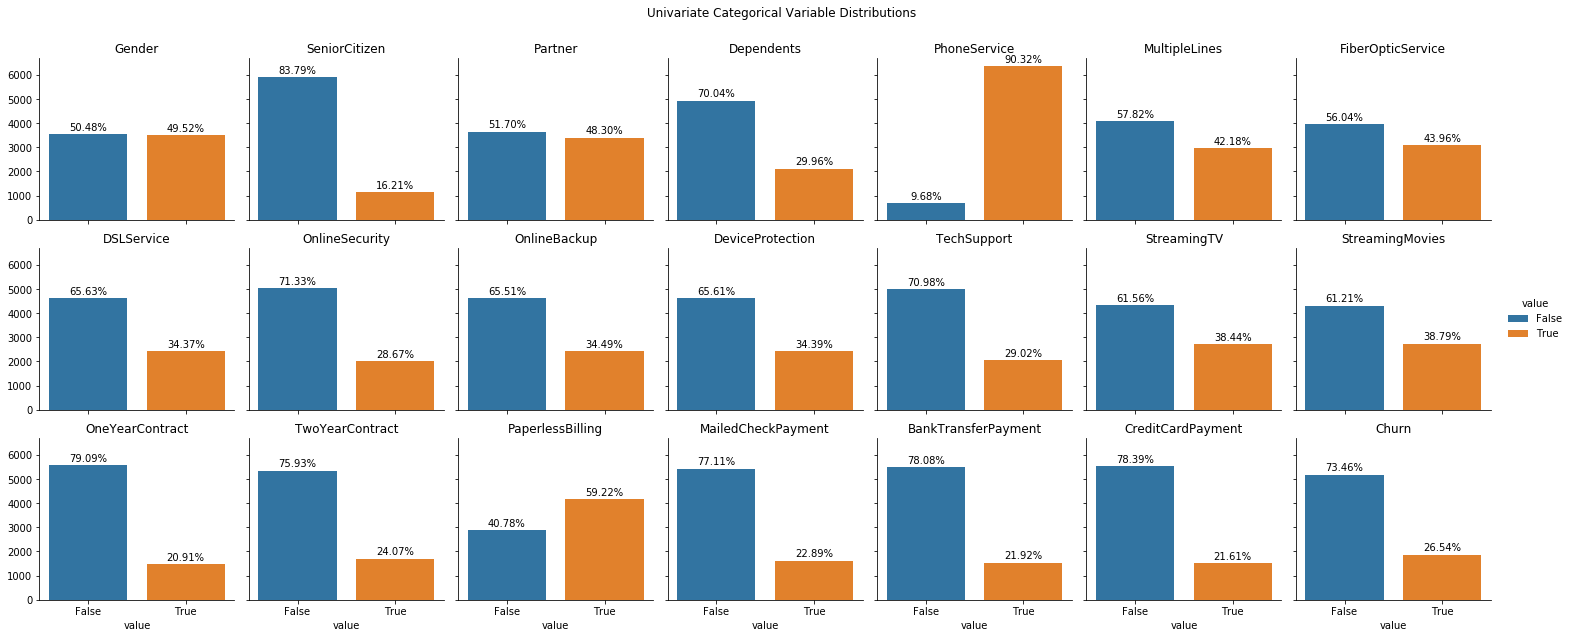

In [289]:
g = sns.FacetGrid(
    melted,
    col = 'variable',
    hue = 'value',
    sharey = 'row',
    sharex = 'col',
    col_wrap = 7,
    legend_out = True,
)

g = g.map(sns.countplot, 'value', order = [False, True]).add_legend()

plt.subplots_adjust(top = 0.9)
g.fig.suptitle('Univariate Categorical Variable Distributions')

# Add the percentage proportion value for each column in each variable plot.
for i, ax in enumerate(g.axes):
    # Set each plot's title to its corresponding column name.
    ax.set_title(viz_df.columns[i])
    for p in ax.patches:
        percentage = "{0:.2f}".format((p.get_height() / n_rows) * 100) + "%"
        
        ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center', xytext = (0, 7), textcoords = 'offset points')

        
g.savefig("Charts/Univariate Distributions.svg")
g

### Continuous Variable Distributions

In [146]:
df['Tenure'].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: Tenure, dtype: float64

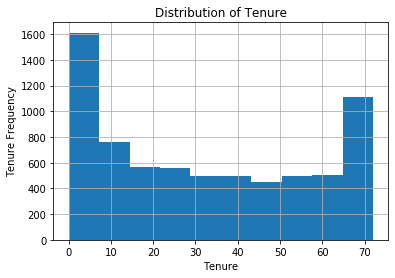

In [147]:
plt.hist(df['Tenure'])
plt.title('Distribution of Tenure')
plt.xlabel('Tenure')
plt.ylabel('Tenure Frequency')
plt.grid(True)
plt.show()

In [148]:
df['MonthlyCharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

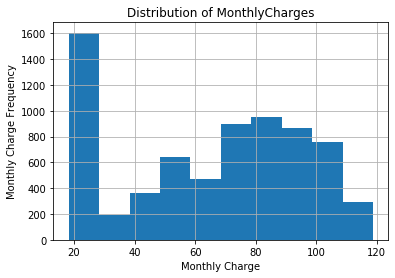

In [149]:
plt.hist(df['MonthlyCharges'])
plt.title('Distribution of MonthlyCharges')
plt.xlabel('Monthly Charge')
plt.ylabel('Monthly Charge Frequency')
plt.grid(True)
plt.show()

In [150]:
df['TotalCharges'].describe()

count    7043.000000
mean     2279.734304
std      2266.794470
min         0.000000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

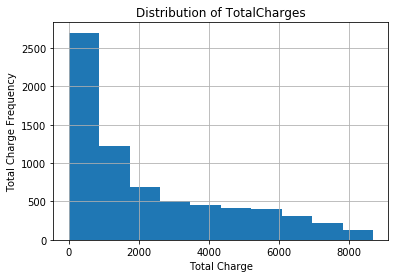

In [151]:
plt.hist(df['TotalCharges'])
plt.title('Distribution of TotalCharges')
plt.xlabel('Total Charge')
plt.ylabel('Total Charge Frequency')
plt.grid(True)
plt.show()

## Bivariate Distribution Visualization

For ease of interpretation and usage given the 2x2 relationships between churn and the other categorical variables, simple contingency tables were used to visualize the categorical bivariate distributions. Bar, pie, and mosaic plots were all considered, but all seemed to overcomplicate the presentation. In each of the following sections, the first table is the raw numbers of the categorical variables, and the second table contains the same information but normalized into proportions.

## <a name = "contingency_creation"></a> Contingency Table Creation

|&emsp;|&emsp;|
|---|---|
|[Gender](#gender_contingency)|[SeniorCitizen](#senior_contingency)|
|[Partner](#partner_contingency)|[Dependents](#dependents_contingency)|
|[PhoneService](#phone_contingency)|[MultipleLines](#lines_contingency)|
|[InternetService](#internet_contingency)|[OnlineSecurity](#security_contingency)|
[OnlineBackup](#backup_contingency)|[DeviceProtection](#protection_contingency)|
|[TechSupport](#support_contingency)|[StreamingTV](#TV_contingency)|
|[StreamingMovies](#movies_contingency)|[Contract](#contract_contingency)|
|[PaperlessBilling](#paperless_contingency)|[PaymentMethod](#payment_contingency)|

### <a name = "gender_contingency"></a> Gender

In [152]:
gender_contingency = pd.crosstab(df["Gender"], df["Churn"])
gender_contingency

Churn,False,True
Gender,,
False,2625,930
True,2549,939


In [153]:
pd.crosstab(df["Gender"], df["Churn"], normalize = "index")

Churn,False,True
Gender,,
False,0.738397,0.261603
True,0.730791,0.269209


The $\chi^2$ test does not show significance, so this column will not be examined in more detail later.

In [154]:
scs.chi2_contingency(gender_contingency)

(0.4840828822091383,
 0.48657873605618596,
 1,
 array([[2611.61010933,  943.38989067],
        [2562.38989067,  925.61010933]]))

[Return](#contingency_creation)

### <a name = "senior_contingency"></a> SeniorCitizen

In [155]:
senior_contingency = pd.crosstab(df["SeniorCitizen"], df["Churn"])
senior_contingency

Churn,False,True
SeniorCitizen,,
False,4508,1393
True,666,476


In [156]:
pd.crosstab(df["SeniorCitizen"], df["Churn"], normalize = "index")

Churn,False,True
SeniorCitizen,,
False,0.763938,0.236062
True,0.583187,0.416813


The $\chi^2$ test shows significance, so this column should be examined in more detail later.

In [157]:
scs.chi2_contingency(senior_contingency)

(159.42630036838742,
 1.510066805092378e-36,
 1,
 array([[4335.05239245, 1565.94760755],
        [ 838.94760755,  303.05239245]]))

[Return](#contingency_creation)

### <a name = "partner_contingency"></a> Partner

In [158]:
partner_contingency = pd.crosstab(df["Partner"], df["Churn"])
partner_contingency

Churn,False,True
Partner,,
False,2441,1200
True,2733,669


In [159]:
pd.crosstab(df["Partner"], df["Churn"], normalize = "index")

Churn,False,True
Partner,,
False,0.670420,0.329580
True,0.803351,0.196649


The $\chi^2$ test shows significance, so this column should be examined in more detail later.

In [160]:
scs.chi2_contingency(partner_contingency)

(158.7333820309922,
 2.1399113440759935e-36,
 1,
 array([[2674.78830044,  966.21169956],
        [2499.21169956,  902.78830044]]))

[Return](#contingency_creation)

### <a name = "dependents_contingency"></a> Dependents

In [161]:
dependents_contingency = pd.crosstab(df["Dependents"], df["Churn"])
dependents_contingency

Churn,False,True
Dependents,,
False,3390,1543
True,1784,326


In [162]:
pd.crosstab(df["Dependents"], df["Churn"], normalize = "index")

Churn,False,True
Dependents,,
False,0.687209,0.312791
True,0.845498,0.154502


The $\chi^2$ test shows significance, so this column should be examined in more detail later.

In [163]:
scs.chi2_contingency(dependents_contingency)

(189.12924940423474,
 4.9249216612154196e-43,
 1,
 array([[3623.93042737, 1309.06957263],
        [1550.06957263,  559.93042737]]))

[Return](#contingency_creation)

### <a name = "phone_contingency"></a> PhoneService

In [164]:
phone_contingency = pd.crosstab(df["PhoneService"], df["Churn"])
phone_contingency

Churn,False,True
PhoneService,,
False,512,170
True,4662,1699


In [165]:
pd.crosstab(df["PhoneService"], df["Churn"], normalize = "index")

Churn,False,True
PhoneService,,
False,0.750733,0.249267
True,0.732904,0.267096


The $\chi^2$ test does not show significance, so this column will not be examined in more detail later.

In [166]:
scs.chi2_contingency(phone_contingency)

(0.9150329892546948,
 0.3387825358066928,
 1,
 array([[ 501.01774812,  180.98225188],
        [4672.98225188, 1688.01774812]]))

[Return](#contingency_creation)

### <a name = "lines_contingency"></a> MultipleLines

In [167]:
lines_contingency = pd.crosstab(df["MultipleLines"], df["Churn"])
lines_contingency

Churn,False,True
MultipleLines,,
False,3053,1019
True,2121,850


In [168]:
pd.crosstab(df["MultipleLines"], df["Churn"], normalize = "index")

Churn,False,True
MultipleLines,,
False,0.749754,0.250246
True,0.713901,0.286099


The $\chi^2$ test shows significance, so this column should be examined in more detail later. It may be that a greater number of lines increases the probability of churn as a result of the higher cost overall.

In [169]:
scs.chi2_contingency(lines_contingency)

(11.143251001456251,
 0.0008433795342472428,
 1,
 array([[2991.41388613, 1080.58611387],
        [2182.58611387,  788.41388613]]))

[Return](#contingency_creation)

### <a name = "internet_contingency"></a> InternetService

In [170]:
fiber_contingency = pd.crosstab(df["FiberOpticService"], df["Churn"])
fiber_contingency

Churn,False,True
FiberOpticService,,
False,3375,572
True,1799,1297


In [171]:
pd.crosstab(df["FiberOpticService"], df["Churn"], normalize = "index")

Churn,False,True
FiberOpticService,,
False,0.855080,0.144920
True,0.581072,0.418928


The $\chi^2$ test shows significance, so this column should be examined in more detail later. Customers who had been purchasing fiber optic services in this data set have a substantial difference in churn rate and should be examined in much greater detail.

In [172]:
scs.chi2_contingency(fiber_contingency)

(666.8080208747958,
 4.940476033744708e-147,
 1,
 array([[2899.58511998, 1047.41488002],
        [2274.41488002,  821.58511998]]))

In [173]:
dsl_contingency = pd.crosstab(df["DSLService"], df["Churn"])
dsl_contingency

Churn,False,True
DSLService,,
False,3212,1410
True,1962,459


In [174]:
pd.crosstab(df["DSLService"], df["Churn"], normalize = "index")

Churn,False,True
DSLService,,
False,0.694937,0.305063
True,0.810409,0.189591


The $\chi^2$ test shows significance, so this column should be examined in more detail later. Customers who had not been purchasing DSL services in this data set have a substantial difference in churn rate and should be examined in much greater detail.

In [175]:
scs.chi2_contingency(dsl_contingency)

(108.07545746651793,
 2.587376621108007e-25,
 1,
 array([[3395.46045719, 1226.53954281],
        [1778.53954281,  642.46045719]]))

[Return](#contingency_creation)

### <a name = "security_contingency"></a> OnlineSecurity

In [176]:
security_contingency = pd.crosstab(df["OnlineSecurity"], df["Churn"])
security_contingency

Churn,False,True
OnlineSecurity,,
False,3450,1574
True,1724,295


In [177]:
pd.crosstab(df["OnlineSecurity"], df["Churn"], normalize = "index")

Churn,False,True
OnlineSecurity,,
False,0.686704,0.313296
True,0.853888,0.146112


The $\chi^2$ test shows significance, so this column should be examined in more detail later. Customers who had been purchasing internet service but not the online security package in this data set have a substantial difference in churn rate and should be examined in much greater detail.

In [178]:
scs.chi2_contingency(security_contingency)

(205.63310416062058,
 1.2320984831180024e-46,
 1,
 array([[3690.78176913, 1333.21823087],
        [1483.21823087,  535.78176913]]))

[Return](#contingency_creation)

### <a name = "backup_contingency"></a> OnlineBackup

In [179]:
backup_contingency = pd.crosstab(df["OnlineBackup"], df["Churn"])
backup_contingency

Churn,False,True
OnlineBackup,,
False,3268,1346
True,1906,523


In [180]:
pd.crosstab(df["OnlineBackup"], df["Churn"], normalize = "index")

Churn,False,True
OnlineBackup,,
False,0.708279,0.291721
True,0.784685,0.215315


The $\chi^2$ test shows significance, so this column should be examined in more detail later.

In [181]:
scs.chi2_contingency(backup_contingency)

(47.260854003612764,
 6.214092807254819e-12,
 1,
 array([[3389.58341616, 1224.41658384],
        [1784.41658384,  644.58341616]]))

[Return](#contingency_creation)

### <a name = "protection_contingency"></a> DeviceProtection

In [182]:
dev_protection_contingency = pd.crosstab(df["DeviceProtection"], df["Churn"])
dev_protection_contingency

Churn,False,True
DeviceProtection,,
False,3297,1324
True,1877,545


In [183]:
pd.crosstab(df["DeviceProtection"], df["Churn"], normalize = "index")

Churn,False,True
DeviceProtection,,
False,0.713482,0.286518
True,0.774979,0.225021


The $\chi^2$ test shows significance, so this column should be examined in more detail later.

In [184]:
scs.chi2_contingency(dev_protection_contingency)

(30.513394539261306,
 3.315693222362861e-08,
 1,
 array([[3394.72582706, 1226.27417294],
        [1779.27417294,  642.72582706]]))

[Return](#contingency_creation)

### <a name = "support_contingency"></a> TechSupport

In [185]:
support_contingency = pd.crosstab(df["TechSupport"], df["Churn"])
support_contingency

Churn,False,True
TechSupport,,
False,3440,1559
True,1734,310


In [186]:
pd.crosstab(df["TechSupport"], df["Churn"], normalize = "index")

Churn,False,True
TechSupport,,
False,0.688138,0.311862
True,0.848337,0.151663


The $\chi^2$ test shows significance, so this column should be examined in more detail later. It appears that customers who has a tech support package had a significantly lower churn rate.

In [187]:
scs.chi2_contingency(support_contingency)

(190.16684201526067,
 2.9235674453140758e-43,
 1,
 array([[3672.4160159, 1326.5839841],
        [1501.5839841,  542.4160159]]))

[Return](#contingency_creation)

### <a name = "TV_contingency"></a> StreamingTV

In [188]:
tv_contingency = pd.crosstab(df["StreamingTV"], df["Churn"])
tv_contingency

Churn,False,True
StreamingTV,,
False,3281,1055
True,1893,814


In [189]:
pd.crosstab(df["StreamingTV"], df["Churn"], normalize = "index")

Churn,False,True
StreamingTV,,
False,0.756688,0.243312
True,0.699298,0.300702


The $\chi^2$ test shows significance, so this column should be examined in more detail later.

In [190]:
scs.chi2_contingency(tv_contingency)

(27.862522274233417,
 1.3024835736732686e-07,
 1,
 array([[3185.35624024, 1150.64375976],
        [1988.64375976,  718.35624024]]))

[Return](#contingency_creation)

### <a name = "movies_contingency"></a> StreamingMovies

In [191]:
movies_contingency = pd.crosstab(df["StreamingMovies"], df["Churn"])
movies_contingency

Churn,False,True
StreamingMovies,,
False,3260,1051
True,1914,818


In [192]:
pd.crosstab(df["StreamingMovies"], df["Churn"], normalize = "index")

Churn,False,True
StreamingMovies,,
False,0.756205,0.243795
True,0.700586,0.299414


The $\chi^2$ test shows significance, so this column should be examined in more detail later.

In [193]:
scs.chi2_contingency(movies_contingency)

(26.25133601003847,
 2.9974738476267514e-07,
 1,
 array([[3166.99048701, 1144.00951299],
        [2007.00951299,  724.99048701]]))

[Return](#contingency_creation)

### <a name = "contract_contingency"></a> Contract

In [194]:
contract_contingency = pd.crosstab(original_df["Contract"], original_df["Churn"])
contract_contingency

Churn,False,True
Contract,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48


In [195]:
pd.crosstab(original_df["Contract"], original_df["Churn"], normalize = "index")

Churn,False,True
Contract,,
Month-to-month,0.572903,0.427097
One year,0.887305,0.112695
Two year,0.971681,0.028319


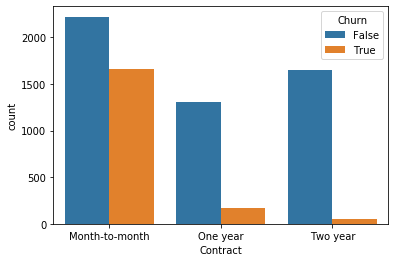

In [196]:
sns.countplot(x = original_df["Contract"], hue = original_df["Churn"])

The $\chi^2$ test shows significance, so this column should be examined in more detail later. Customers who had been in a month to month contract in this data set have a substantial difference in churn rate, likely because of the lack of legal agreements preventing ease of churn, and should be examined in much greater detail.

In [197]:
scs.chi2_contingency(contract_contingency)

(1184.5965720837926,
 5.863038300673391e-258,
 2,
 array([[2846.69175067, 1028.30824933],
        [1082.11018032,  390.88981968],
        [1245.198069  ,  449.801931  ]]))

[Return](#contingency_creation)

### <a name = "paperless_contingency"></a> PaperlessBilling

In [198]:
paperless_contingency = pd.crosstab(df["PaperlessBilling"], df["Churn"])
paperless_contingency

Churn,False,True
PaperlessBilling,,
False,2403,469
True,2771,1400


In [199]:
pd.crosstab(df["PaperlessBilling"], df["Churn"], normalize = "index")

Churn,False,True
PaperlessBilling,,
False,0.836699,0.163301
True,0.664349,0.335651


The $\chi^2$ test shows significance, so this column should be examined in more detail later. Customers who had been enrolled in paperless billing have a substantial difference in churn rate and should be examined in more detail later.

In [200]:
scs.chi2_contingency(paperless_contingency)

(258.27764906707307,
 4.073354668665985e-58,
 1,
 array([[2109.85773108,  762.14226892],
        [3064.14226892, 1106.85773108]]))

[Return](#contingency_creation)

### <a name = "payment_contingency"></a> PaymentMethod

In [201]:
payment_contingency = pd.crosstab(original_df["PaymentMethod"], original_df["Churn"])
payment_contingency

Churn,False,True
PaymentMethod,,
Bank transfer (automatic),1286,258
Credit card (automatic),1290,232
Electronic check,1294,1071
Mailed check,1304,308


In [202]:
pd.crosstab(original_df["PaymentMethod"], original_df["Churn"], normalize = "index")

Churn,False,True
PaymentMethod,,
Bank transfer (automatic),0.832902,0.167098
Credit card (automatic),0.847569,0.152431
Electronic check,0.547146,0.452854
Mailed check,0.808933,0.191067


[Text(0, 0, 'Electronic check'),
 Text(0, 0, 'Mailed check'),
 Text(0, 0, 'Bank transfer (automatic)'),
 Text(0, 0, 'Credit card (automatic)')]

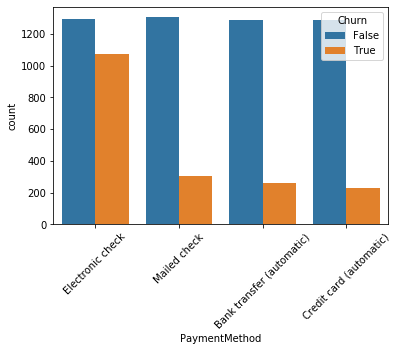

In [203]:
fig = sns.countplot(x = original_df["PaymentMethod"], hue = original_df["Churn"])
fig.set_xticklabels(fig.get_xticklabels(), rotation = 45)

The $\chi^2$ test shows significance, so this column should be examined in more detail later. Customers who had been paying via electronic check have a substantial difference in churn rate and should be examined in much greater detail later.

In [204]:
scs.chi2_contingency(paperless_contingency)

(258.27764906707307,
 4.073354668665985e-58,
 1,
 array([[2109.85773108,  762.14226892],
        [3064.14226892, 1106.85773108]]))

[Return](#contingency_creation)

## Continuous Variable Churn Distribution <a name = "continuous_distribution"></a>

* [Tenure](#tenure_distribution)
* [MonthlyCharges](#monthly_distribution)
* [TotalCharges](#total_distribution)

In [205]:
churn_df = df[df['Churn'] == True]
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1869 entries, 2 to 7041
Data columns (total 24 columns):
Gender                 1869 non-null bool
SeniorCitizen          1869 non-null bool
Partner                1869 non-null bool
Dependents             1869 non-null bool
Tenure                 1869 non-null int64
PhoneService           1869 non-null bool
MultipleLines          1869 non-null bool
FiberOpticService      1869 non-null bool
DSLService             1869 non-null bool
OnlineSecurity         1869 non-null bool
OnlineBackup           1869 non-null bool
DeviceProtection       1869 non-null bool
TechSupport            1869 non-null bool
StreamingTV            1869 non-null bool
StreamingMovies        1869 non-null bool
OneYearContract        1869 non-null bool
TwoYearContract        1869 non-null bool
PaperlessBilling       1869 non-null bool
MailedCheckPayment     1869 non-null bool
BankTransferPayment    1869 non-null bool
CreditCardPayment      1869 non-null bool
MonthlyCha

In [206]:
not_churn_df = df[df['Churn'] == False]
not_churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5174 entries, 0 to 7042
Data columns (total 24 columns):
Gender                 5174 non-null bool
SeniorCitizen          5174 non-null bool
Partner                5174 non-null bool
Dependents             5174 non-null bool
Tenure                 5174 non-null int64
PhoneService           5174 non-null bool
MultipleLines          5174 non-null bool
FiberOpticService      5174 non-null bool
DSLService             5174 non-null bool
OnlineSecurity         5174 non-null bool
OnlineBackup           5174 non-null bool
DeviceProtection       5174 non-null bool
TechSupport            5174 non-null bool
StreamingTV            5174 non-null bool
StreamingMovies        5174 non-null bool
OneYearContract        5174 non-null bool
TwoYearContract        5174 non-null bool
PaperlessBilling       5174 non-null bool
MailedCheckPayment     5174 non-null bool
BankTransferPayment    5174 non-null bool
CreditCardPayment      5174 non-null bool
MonthlyCha

### <a name = "tenure_distribution"></a> Tenure

In regards to the customers who churned and those that did not in this data set, there is a very substantial difference in Tenure. As expected, the lower the tenure, the higher the relative percentage of churn rate.

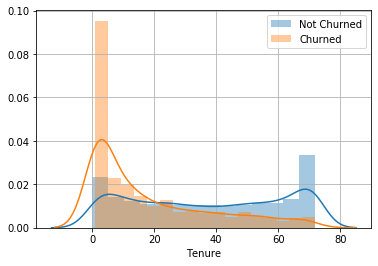

In [207]:
sns.distplot(not_churn_df['Tenure'])
sns.distplot(churn_df['Tenure'])
plt.grid(True)
plt.legend(["Not Churned", "Churned"])

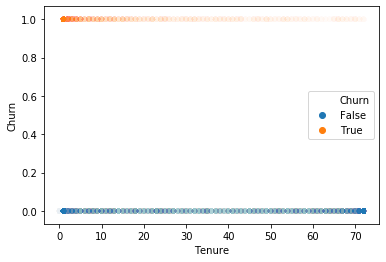

In [208]:
ax = sns.scatterplot(x = 'Tenure', y = 'Churn', data = df, hue = 'Churn', alpha = 0.0075)

[Return](#continuous_distribution)

### <a name = "monthly_distribution"></a> MonthlyCharges

In looking at the MonthlyCharges and TotalCharges values, it becomes clear that the churned and not churned distribution differ on these columns. The churn rate is much higher when a customer has a higher MonthlyCharges value. This is to be expected since a higher monthly bill causes more financial pressure on the customer and gives a greater performance expectation on the end of the service provider. It appears that over 35% of customers who have not churned have 20-25 as their MonthlyCharges value.

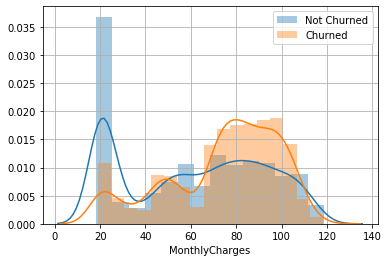

In [209]:
sns.distplot(not_churn_df['MonthlyCharges'])
sns.distplot(churn_df['MonthlyCharges'])
plt.grid(True)
plt.legend(["Not Churned", "Churned"])

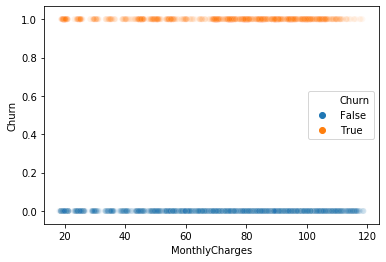

In [210]:
ax = sns.scatterplot(x = 'MonthlyCharges', y = 'Churn', data = df, hue = 'Churn', alpha = 0.05)

[Return](#continuous_distribution)

### <a name = "total_distribution"></a> Total Charges

With the TotalCharges column, the distribution in churned and not churned is less of a difference than in the MonthlyCharges column, but is still substantial. The lower the TotalCharges, the higher the churn rate. It appears that over 10% of all customers who have churned had less than 400 TotalCharges.

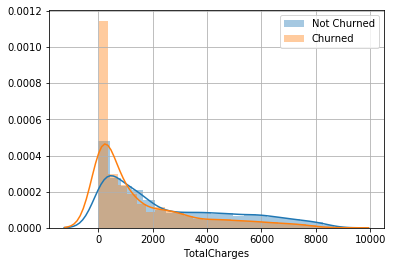

In [211]:
sns.distplot(not_churn_df['TotalCharges'])
sns.distplot(churn_df['TotalCharges'])
plt.grid(True)
plt.legend(["Not Churned", "Churned"])

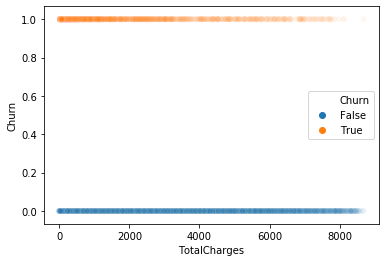

In [212]:
ax = sns.scatterplot(x = 'TotalCharges', y = 'Churn', data = df, hue = 'Churn', alpha = 0.05)

[Return](#continuous_distribution)

A demographic seems to be forming by combining all of these insights. The type of person that is most likely to have churned in this dataset are those that have indicators of a greater knowledge of computers, like opting for fiber optic speeds, paying with e-checks, utilizing paperless billing and had been doing everything online as a result. Other factors that seem to be strongly affecting churn rate are having a low monthly charge, being a senior citizen, perhaps as a result of death, and ease of attrition, like being on a short term, month to month contract rather than a long term one.

The two columns that did not have significance will be removed to simplify later calculations.

In [213]:
df.drop(['Gender', 'PhoneService'], axis = 1, inplace = True)

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
SeniorCitizen          7043 non-null bool
Partner                7043 non-null bool
Dependents             7043 non-null bool
Tenure                 7043 non-null int64
MultipleLines          7043 non-null bool
FiberOpticService      7043 non-null bool
DSLService             7043 non-null bool
OnlineSecurity         7043 non-null bool
OnlineBackup           7043 non-null bool
DeviceProtection       7043 non-null bool
TechSupport            7043 non-null bool
StreamingTV            7043 non-null bool
StreamingMovies        7043 non-null bool
OneYearContract        7043 non-null bool
TwoYearContract        7043 non-null bool
PaperlessBilling       7043 non-null bool
MailedCheckPayment     7043 non-null bool
BankTransferPayment    7043 non-null bool
CreditCardPayment      7043 non-null bool
MonthlyCharges         7043 non-null float64
TotalCharges           7043 non-null float64
Chur

## Correlation

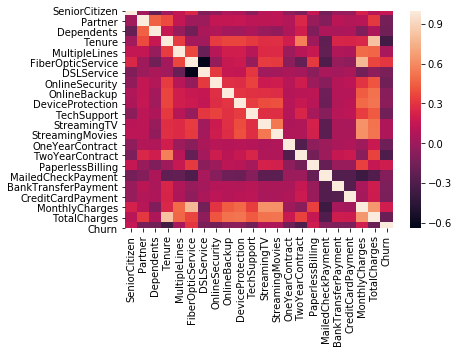

In [215]:
sns.heatmap(
    df.corr(),
    xticklabels = df.columns,
    yticklabels = df.columns
)

Most of this correlation heatmap makes intuitive sense; people who pay for movie streaming are more likely to also pay for TV streaming, a higher monthly rate leads to a higher total amount paid, those that have partners also have more dependents. Additionally, StreamingTV and StreamingMovies are correlated with higher MonthlyCharges. However, a few important things jump out. Tenure and TotalCharges are extremely correlated, possibly enough to skew the entire model, TwoYearContracts are correlated with higher Tenure, and perhaps most importantly FiberOpticService is the most correlated variable with CHurn. FiberOpticService is also correlated with a higher MonthlyCharges value, perhaps partially explaining the link to Churn.

# <a name = "analysis"></a> Data Analysis
* [MCA](#mca)
* [PCA](#pca)
* [FAMD](#famd)

Now the data can be examined using data mining techniques. To continue exploring the data and to find the most important variables for the predictive analysis, MCA, or Multiple Correspondence Analysis will be used. Any low order interactions will be looked for by plotting and examining the results of the MCA.

In [216]:
import warnings
warnings.filterwarnings('ignore')

### <a name = "mca"></a> MCA

In [217]:
mca_df = df[['SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
             'FiberOpticService', 'DSLService', 'OnlineSecurity', 'OnlineBackup',
             'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
             'OneYearContract', 'TwoYearContract', 'PaperlessBilling',
             'MailedCheckPayment', 'BankTransferPayment', 'CreditCardPayment']]

In [218]:
mca = prince.MCA(
    n_components = 18,
    n_iter = 3,
    copy = True
)
mca = mca.fit(mca_df)

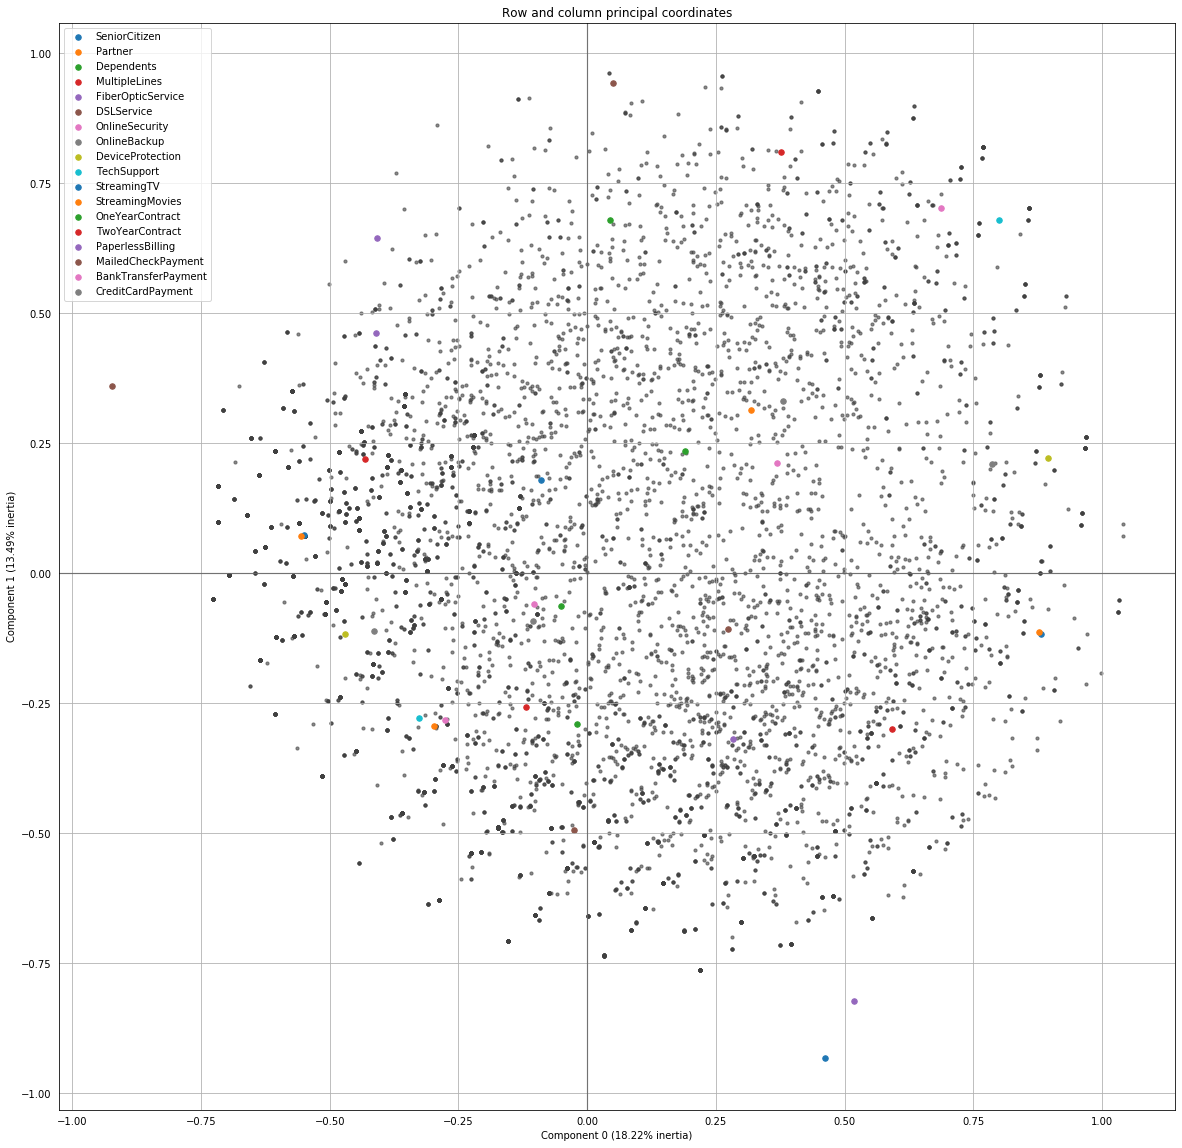

In [219]:
ax = mca.plot_coordinates(
    X = mca_df,
    ax = None,
    figsize=(20, 20),
    show_row_points=True,
    row_points_size=10,
    show_row_labels=False,
    show_column_points=True,
    column_points_size=30,
    show_column_labels=False,
    legend_n_cols=1
)

plt.savefig('Charts/MCA With Rows.svg')

In [220]:
mca_eigenvalues = mca.eigenvalues_
mca_eigenvalues

[0.18215878233504215,
 0.13486243244317503,
 0.0851054536060337,
 0.07099623972076913,
 0.06845680757433464,
 0.060425499184298945,
 0.05162360236621634,
 0.04949224423636462,
 0.04578464962160184,
 0.038440267282812496,
 0.03732833124325017,
 0.03502522054614435,
 0.03386588305995358,
 0.030203970598546497,
 0.026370994188364753,
 0.02578309341080396,
 0.016938795588812717,
 0.007137732993476052]

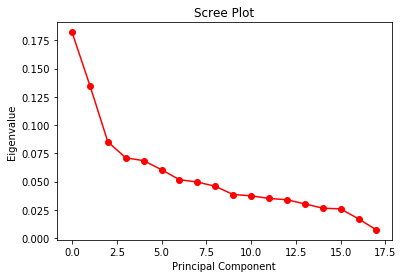

In [221]:
plt.plot(np.arange(18), mca_eigenvalues, 'ro-')
plt.title("Scree Plot")
plt.xlabel("Principal Component")
plt.ylabel("Eigenvalue")
plt.show()

<a name = "MCA_plot"></a>
The MCA of the cleaned data is below. The first thing to notice is that these two factors only account for 31.71% of total inertia. There's a lot of variance in this dataset that isn't explained by this visualization, but these are the 2 Principal factors.

The second thing to notice is that it shows a number of distinct clusters of columns and their discrimination in the dataset. Although this MCA plots all of the columns twice, once for each of their boolean values, a several columns are clustered together on both values.

Some, like StreamingMovies and StreamingTV not only have an almost negligible difference from one another, shown by the lack of angle between their vectors and their base point at the center, but also have virtually the same discrimination, represented by their length from the base point. Their points actually overlap in this visualization. This coupled with their relatively high correlation in the correlation heatmap means that the final model would likely be improved by removing one of these values. As StreamingMovies appears to be slightly more discriminating, StreamingTV will be removed.

Other clusters, like DeviceProtection and OnlineBackup are very closely related to each other, but have have differing discrimination. DeviceProtection is more discriminating in both value cases, and would be kept over OnlineBackup if one of these needed removed, but their direct correlation with each other is pretty average based on the correlation coefficient heatmap. These columns and the StreamingTV/StreamingMovies columns make sense as possible interactions because the customers that get one are significantly more likely to get the other in their respective clusters.

Finally, two other natural clusters draw the eye; the first is TechSupport_False, OnlineSecurity_False, and Partner_False, and the second is BankTransferPayment_False, CreditCardPayment_False, and OneYearContract_False. These are interesting, but much less of a concern than the overlapping StreamingTV/Movies columns, as their True value counterparts are considerably spread out, both by discrimination and similiarities with each other.

In [222]:
mca = prince.MCA(
    n_components = 3,
    n_iter = 3,
    copy = True
)
mca = mca.fit(mca_df)

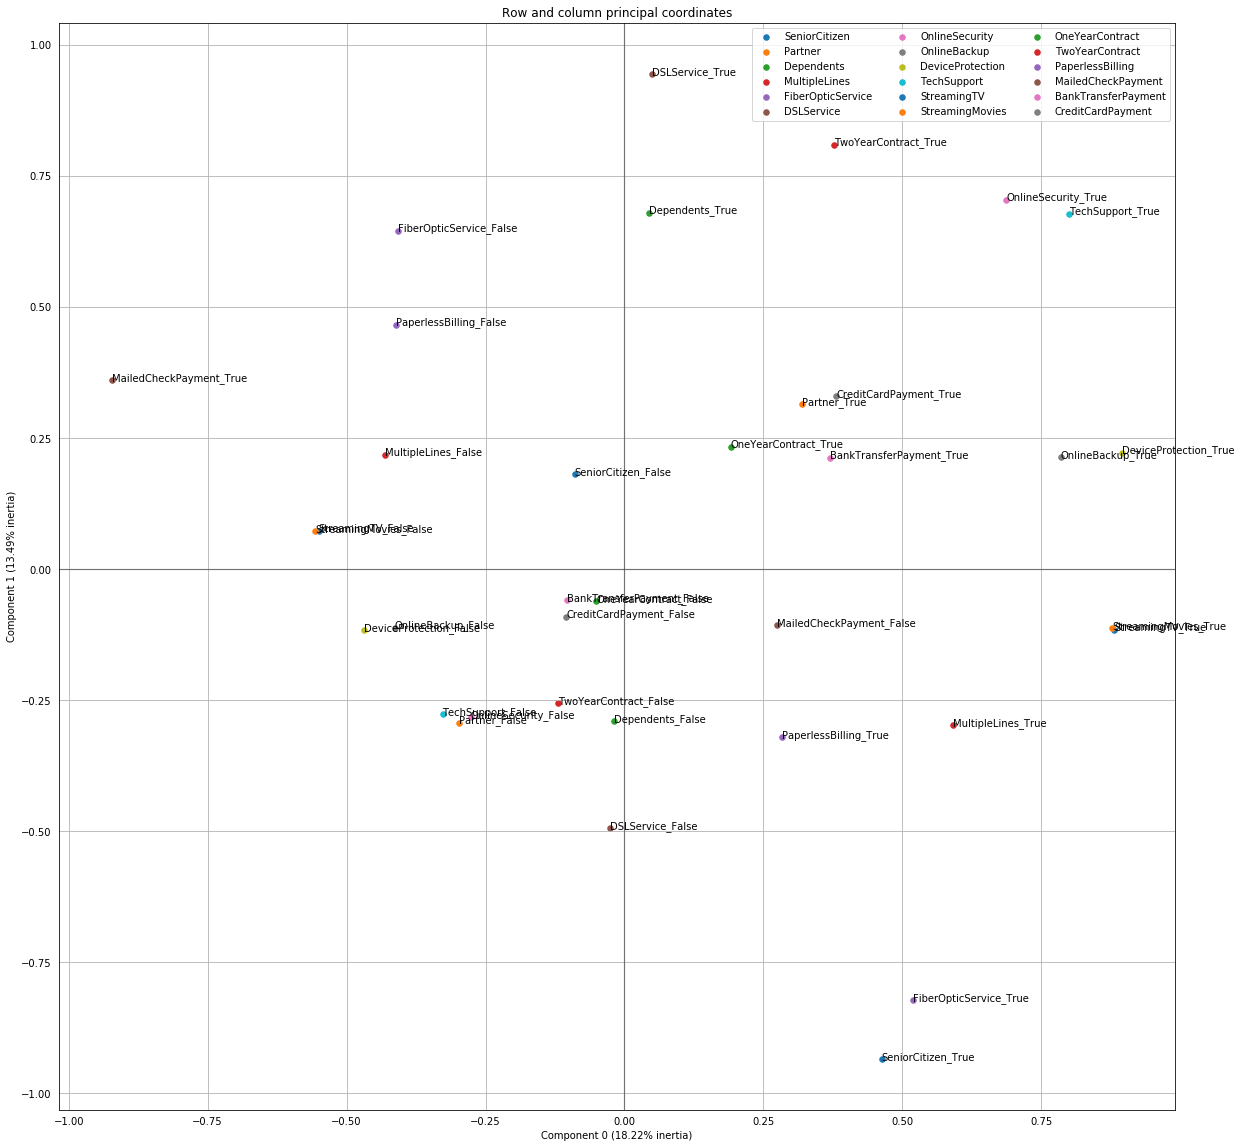

In [223]:
ax = mca.plot_coordinates(
    X = mca_df,
    ax = None,
    figsize=(20, 20),
    show_row_points=False,
    show_row_labels=False,
    show_column_points=True,
    column_points_size=30,
    show_column_labels=True,
    legend_n_cols=3
)
plt.savefig('Charts/MCA.svg')

### <a name = "pca"></a> PCA

In [224]:
pca_df = df[['Tenure', 'MonthlyCharges', 'TotalCharges']]

In [225]:
pca_df = preprocessing.MinMaxScaler().fit_transform(pca_df)
pca_df

array([[0.01388889, 0.11542289, 0.00343704],
       [0.47222222, 0.38507463, 0.21756402],
       [0.02777778, 0.35422886, 0.01245279],
       ...,
       [0.15277778, 0.11293532, 0.03989153],
       [0.05555556, 0.55870647, 0.03530306],
       [0.91666667, 0.86965174, 0.78810105]])

In [226]:
# Rewrite the normalized columns back to the base dataframe for the upcoming analyses.
df['Tenure'] = (df['Tenure'] - df['Tenure'].mean()) / df['Tenure'].std()
df['MonthlyCharges'] = (df['MonthlyCharges'] - df['MonthlyCharges'].mean()) / df['MonthlyCharges'].std()
df['TotalCharges'] = (df['TotalCharges'] - df['TotalCharges'].mean()) / df['TotalCharges'].std()

In [227]:
pca = prince.PCA(
     n_components=3,
     n_iter=3,
     copy=True,
     check_input=True,
)
pca = pca.fit(pca_df)

No handles with labels found to put in legend.


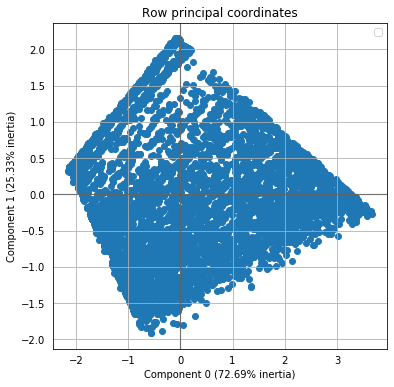

In [228]:
ax = pca.plot_row_coordinates(
    pca_df,
    ax = None,
    figsize = (6, 6),
    x_component = 0,
    y_component = 1
)

In [229]:
pca.explained_inertia_

[0.7268883792805116, 0.25325809879467087, 0.01985352192481742]

In [230]:
pca.column_correlations(pca_df)

,0,1,2
0,0.837734,0.528903,0.135878
1,0.717447,-0.690778,0.089971
2,0.981905,0.053484,-0.181667


In the process of looking into principal components and variable interactions, it is worth looking at the continuous variable columns and reconsidering what they may represent. Tenure may be better decribed as the amount of bills a customer has had, and if that is the case, then TotalCharges may be nothing more than Tenure * MonthlyCharges.

As seen in the test below, this isn't exactly the case, but the correlation between Tenure and MonthlyCharges, and TotalCharges is very high, with a Pearson correlation coefficient of 0.83 between Tenure and TotalCharges. Given the high correlation between these, TotalCharges will be removed from the dataframe before the logistic regression is performed.

In [231]:
df[['Tenure', 'MonthlyCharges', 'TotalCharges']].corr()

,Tenure,MonthlyCharges,TotalCharges
Tenure,1.000000,0.247900,0.826178
MonthlyCharges,0.247900,1.000000,0.651174
TotalCharges,0.826178,0.651174,1.000000


In [232]:
test_df = original_df[['Tenure', 'MonthlyCharges', 'TotalCharges']]
test_df['TenureMonthlyCharges'] = test_df['Tenure'] * test_df['MonthlyCharges']
test_df['Difference'] = test_df['TenureMonthlyCharges'] - test_df['TotalCharges']
test_df.describe()

,Tenure,MonthlyCharges,TotalCharges,TenureMonthlyCharges,Difference
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304,2279.581350,-0.152953
std,24.559481,30.090047,2266.794470,2264.729447,67.202778
min,0.000000,18.250000,0.000000,0.000000,-373.250000
25%,9.000000,35.500000,398.550000,394.000000,-28.500000
50%,29.000000,70.350000,1394.550000,1393.600000,0.000000
75%,55.000000,89.850000,3786.600000,3786.100000,28.600000
max,72.000000,118.750000,8684.800000,8550.000000,370.850000


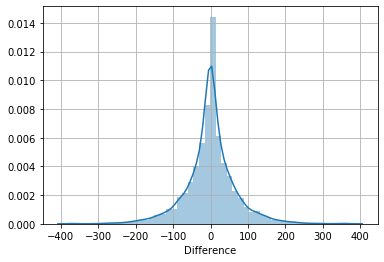

In [233]:
sns.distplot(test_df['Difference'])
plt.grid(True)

Now the columns identified as interactions or flagged for removal with the MCA, PCA, and correlation tests can be removed.

In [234]:
df.drop(['StreamingTV', 'TotalCharges'], axis = 1, inplace = True)

### <a name = "famd"></a> FAMD
To continue exploring the data and to find the most important variables for the predictive analysis, FAMD, or Factor Analysis of Mixed Data will be used.

In [235]:
famd = prince.FAMD(
    n_components = 20,
    n_iter = 3,
    copy = True
)
famd = famd.fit(df)

With the factor analysis performed, we can examine the eigenvalues of the dataset and determine what eigenvectors to consider. Judging by the scree plot, the top 4 vectors should be used.

In [236]:
eigenvalues = famd.eigenvalues_
eigenvalues

[1.3934409203989468,
 0.7335955145699093,
 0.6747811569176864,
 0.16300031504936702,
 0.10912111549558255,
 0.08597713294817523,
 0.08471337252757039,
 0.07689480167820648,
 0.06994335210310547,
 0.06790319611467667,
 0.06182116997501196,
 0.057821381747244986,
 0.055741802793307725,
 0.05250894093022588,
 0.05077638525372531,
 0.0485356505223153,
 0.038270382492945225,
 0.02289045346256873,
 0.018366894899560567,
 0.014173621899521156]

The scree plot below shows that 4 factors are an adequate amount to use for modeling.

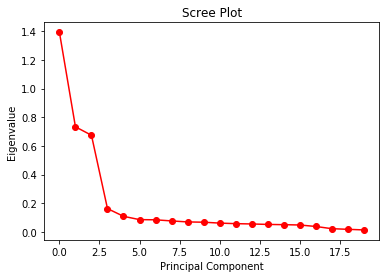

In [237]:
plt.plot(np.arange(20), eigenvalues, 'ro-')
plt.title("Scree Plot")
plt.xlabel("Principal Component")
plt.ylabel("Eigenvalue")
plt.show()

In [238]:
famd = prince.FAMD(
    n_components = 4,
    n_iter = 3,
    copy = True
)
famd = famd.fit(df)

In [239]:
eigenvalues = famd.eigenvalues_
eigenvalues

[1.3934409204854312,
 0.7335955122650868,
 0.6747811488940323,
 0.1629938863475917]

In [240]:
famd.explained_inertia_

[0.35910856842937416,
 0.18905748377473677,
 0.17390022699925284,
 0.04200572864519644]

However, this only equates to 76.4% of variance of the dataset explained. A 5th factor may be necessary for proper accuracy.

In [241]:
sum(famd.explained_inertia_)

0.7640720078485603

In [242]:
famd.column_correlations(df)

,0,1,2,3
DSLService,-0.102155,-0.071361,0.159414,-0.122870
MultipleLines,0.528898,-0.164727,-0.501276,0.158218
Churn,-0.068418,0.431927,-0.171190,0.428358
MailedCheckPayment,-0.394541,0.104815,0.385285,-0.142482
DeviceProtection,0.540366,-0.197343,-0.494249,0.148635
FiberOpticService,0.553599,0.262111,-0.777801,0.646707
PaperlessBilling,0.247266,0.121161,-0.346142,0.291692
TwoYearContract,0.268859,-0.600647,0.043417,-0.490537
TechSupport,0.419837,-0.212003,-0.349522,0.059269
CreditCardPayment,0.154922,-0.228437,-0.042583,-0.149762


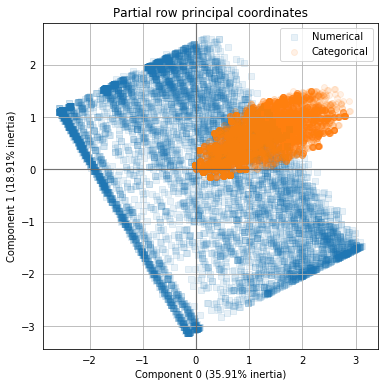

In [243]:
plot = famd.plot_partial_row_coordinates(
     df,
     ax=None,
     figsize=(6, 6),
     x_component=0,
     y_component=1,
     alpha = 0.1
)

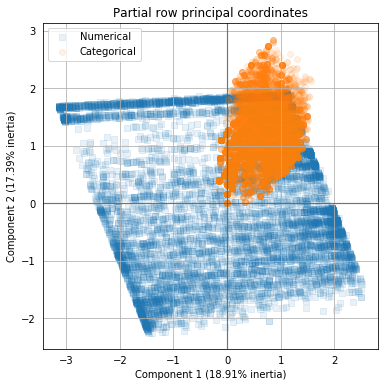

In [244]:
plot2 = famd.plot_partial_row_coordinates(
     df,
     ax=None,
     figsize=(6, 6),
     x_component=1,
     y_component=2,
     alpha = 0.1
)

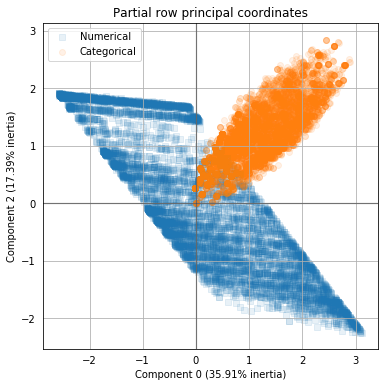

In [245]:
plot3 = famd.plot_partial_row_coordinates(
     df,
     ax=None,
     figsize=(6, 6),
     x_component=0,
     y_component=2,
     alpha = 0.1
)

In [246]:
three_dimension_fa = famd.row_contributions(df)
three_dimension_fa

,0,1,2,3
0,0.882797,0.559959,0.811645,0.000041
1,0.008367,0.019372,0.034542,0.003672
2,0.347024,0.914571,0.102900,0.076616
3,0.018341,0.447507,0.273310,0.120922
4,0.126795,1.262461,0.010533,0.167145
...,...,...,...,...
7038,0.029263,0.244650,0.201811,0.130923
7039,1.244258,0.994727,0.977425,0.005612
7040,0.639374,0.156971,0.800820,0.013135
7041,0.072412,1.200753,0.033086,0.162248


<a name = "potential_svm"></a>

In [247]:
from mpl_toolkits.mplot3d import Axes3D

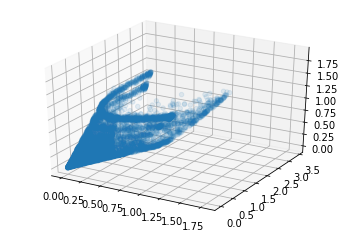

In [248]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
x = three_dimension_fa[0]
y = three_dimension_fa[1]
z = three_dimension_fa[2]
ax.scatter(x, y, z, alpha = 0.1)

In [249]:
three_dimension_fa_churn = three_dimension_fa.copy(deep = True)
three_dimension_fa_churn['Churn'] = df['Churn']

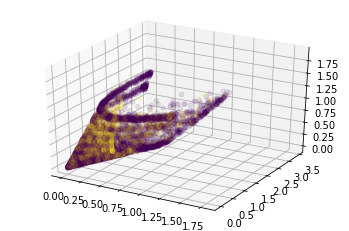

In [250]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
x = three_dimension_fa_churn[0]
y = three_dimension_fa_churn[1]
z = three_dimension_fa_churn[2]
color = three_dimension_fa_churn['Churn']
ax.scatter(x, y, z, c = color, alpha = 0.1)

pickle.dump(fig, open('3D FAMD Churn.fig.pickle', 'wb'))
fig.savefig("Charts/FAMD Churn.svg")

## <a name = "regression"></a> Logistic Regression

Two models will be created using Logistic Regression here, once with the basic cleaned dataframe, and another using the Factor Analysis of Mixed Data results.

In [251]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, classification_report, roc_curve, auc

### Base Dataframe Model

In [252]:
x_df = df.drop('Churn', axis = 1)

In [253]:
# Random_state is set to allow exact reproducibility.
x_train, x_test, y_train, y_test = train_test_split(x_df, df['Churn'],
    test_size = 0.1, random_state = 1)

In [254]:
regression = LogisticRegression()
regression.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [255]:
regression.intercept_

array([-2.14121805])

In [256]:
regression.coef_

array([[ 0.22680933, -0.00440932, -0.11375933, -0.79849974,  0.20898317,
         1.683634  ,  0.88671329, -0.40286786, -0.09805871,  0.03363374,
        -0.30891087,  0.37943566, -0.66759031, -1.36620076,  0.3358983 ,
        -0.35053947, -0.34015657, -0.39539662,  0.01770752]])

In [257]:
coefs = pd.concat([pd.DataFrame(df.columns.drop('Churn')),
                   pd.DataFrame(np.transpose(regression.coef_))], axis = 1)

coefs.columns = ["Column", "Coefficient"]
coefs

,Column,Coefficient
0,SeniorCitizen,0.226809
1,Partner,-0.004409
2,Dependents,-0.113759
3,Tenure,-0.798500
4,MultipleLines,0.208983
5,FiberOpticService,1.683634
6,DSLService,0.886713
7,OnlineSecurity,-0.402868
8,OnlineBackup,-0.098059
9,DeviceProtection,0.033634


In [258]:
coefs.where(coefs['Coefficient'] > 0).sort_values(['Coefficient'], ascending = False).dropna()

,Column,Coefficient
5,FiberOpticService,1.683634
6,DSLService,0.886713
11,StreamingMovies,0.379436
14,PaperlessBilling,0.335898
0,SeniorCitizen,0.226809
4,MultipleLines,0.208983
9,DeviceProtection,0.033634
18,MonthlyCharges,0.017708


In [259]:
coefs.where(coefs['Coefficient'] < 0).sort_values(['Coefficient']).dropna()

,Column,Coefficient
13,TwoYearContract,-1.366201
3,Tenure,-0.798500
12,OneYearContract,-0.667590
7,OnlineSecurity,-0.402868
17,CreditCardPayment,-0.395397
15,MailedCheckPayment,-0.350539
16,BankTransferPayment,-0.340157
10,TechSupport,-0.308911
2,Dependents,-0.113759
8,OnlineBackup,-0.098059


These show that the strongest positive predictor variables are having Internet service, particularly Fiber optic service, paying for movie or TV streaming, and being enrolled in paperless billing. Additionally, these also show the strongest negative predictors of churn are having a non-month-to-month contract, particularly a two year contract, having a higher tenure value, paying for an online security package, and having any payment method other than electronic check.

In testing the model, we get an accuracy of 81.13%. This is 31.13% better than chance on average.

In [260]:
accuracy = regression.score(x_test, y_test)
accuracy

0.8113475177304964

In [261]:
predictions = regression.predict(x_test)
actual = y_test

In [262]:
confusion = confusion_matrix(actual, predictions)
confusion

array([[479,  54],
       [ 79,  93]], dtype=int64)

In [263]:
precision = precision_score(actual, predictions)
precision

0.6326530612244898

Though the accuracy is high, the precision and recall on True Churns could use some improvement and indicate that the model could be adjusted for better results. Having a larger proportion of customers that churned in the training dataset would help a lot and would be easier to get the data for in this situation than many others.

In [264]:
print(classification_report(actual, predictions))

              precision    recall  f1-score   support

       False       0.86      0.90      0.88       533
        True       0.63      0.54      0.58       172

    accuracy                           0.81       705
   macro avg       0.75      0.72      0.73       705
weighted avg       0.80      0.81      0.81       705



In [265]:
probabilities = regression.predict_proba(x_test)
predictions = probabilities[:,1]

In [266]:
false_positive_rate, true_positive_rate, threshold =\
    roc_curve(y_test, predictions)

Finally, by calculating the ROC and AUC, we get an AUC of 0.84, which indicates an excellent model relative to chance.

In [267]:
roc_auc = auc(false_positive_rate, true_positive_rate)

In [268]:
roc_auc

0.8421942493127973

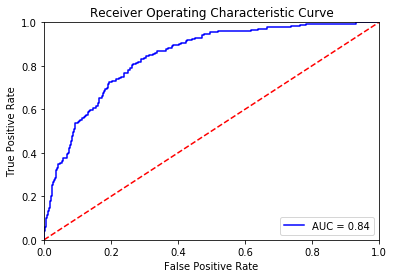

In [269]:
plt.title('Receiver Operating Characteristic Curve')
plt.plot(false_positive_rate, true_positive_rate, 'blue',
         label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('Charts/ROC AUC.svg')
plt.show()

### FAMD Based Logistic Regression Model

In [270]:
famd_df = df.copy(deep = True)

In [271]:
# Random_state is set to allow exact reproducibility.
famd_x_train, famd_x_test, famd_y_train, famd_y_test = train_test_split(famd_df.drop(['Churn'], axis = 1), famd_df['Churn'],
    test_size = 0.1, random_state = 1)

In [272]:
famd = prince.FAMD(
    n_components = 5,
    n_iter = 3,
    copy = True
)
famd = famd.fit(famd_x_train)

In [273]:
famd.column_correlations(famd_df)

,0,1,2,3,4
DSLService,-0.100882,0.121104,0.108692,-0.126099,-0.158809
MultipleLines,0.528091,-0.023063,-0.530585,0.223502,0.229530
MailedCheckPayment,-0.393740,0.037720,0.397323,-0.192324,-0.188543
DeviceProtection,0.539898,0.009306,-0.539978,0.221229,0.205505
FiberOpticService,0.548373,-0.511974,-0.571199,0.699766,0.715311
PaperlessBilling,0.244976,-0.232041,-0.251903,0.315083,0.310328
TwoYearContract,0.273575,0.567662,-0.253554,-0.438470,-0.440033
TechSupport,0.420089,0.073158,-0.416997,0.119724,0.097706
CreditCardPayment,0.156499,0.195271,-0.149484,-0.123219,-0.129501
OnlineBackup,0.511640,0.036435,-0.510726,0.182198,0.166229


In [274]:
famd_x = famd.transform(famd_x_train)
famd_x

,0,1,2,3,4
1144,-0.658755,-0.483230,1.359566,0.246775,-0.428892
4867,1.347853,-0.716190,0.004799,-0.256819,0.392239
4793,1.789362,-0.263427,0.183537,-0.038438,-0.000527
5304,0.151470,-0.704028,0.577799,-0.413002,0.274259
6192,0.395527,-0.824554,0.495050,-0.280361,-0.388576
...,...,...,...,...,...
905,0.977050,-1.574820,0.435212,-0.258079,-0.267402
5192,-0.139433,1.653669,0.645249,-0.354361,0.084785
3980,1.473054,-1.110007,0.138658,-0.114690,-0.249897
235,-0.216571,-0.722307,1.319012,0.198001,-0.382773


This regression will be fitted with the FAMD transformed version of the training split data instead of the base split.

In [275]:
famd_regression = LogisticRegression()
famd_regression.fit(famd_x, famd_y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [276]:
famd_regression.coef_

array([[-0.14528036, -1.79793415,  0.0583536 , -0.68493203, -0.49683262]])

In [277]:
famd_accuracy = famd_regression.score(famd.transform(famd_x_test), famd_y_test)
famd_accuracy

0.8

In [278]:
famd_predictions = regression.predict(famd_x_test)
famd_actual = famd_y_test

In [279]:
famd_confusion = confusion_matrix(famd_actual, famd_predictions)
famd_confusion

array([[479,  54],
       [ 79,  93]], dtype=int64)

In [280]:
famd_precision = precision_score(famd_actual, famd_predictions)
famd_precision

0.6326530612244898

Notice that the results are exactly the same as the model trained on the base dataset.

In [281]:
print(classification_report(famd_actual, famd_predictions))

              precision    recall  f1-score   support

       False       0.86      0.90      0.88       533
        True       0.63      0.54      0.58       172

    accuracy                           0.81       705
   macro avg       0.75      0.72      0.73       705
weighted avg       0.80      0.81      0.81       705



In [282]:
famd_probabilities = regression.predict_proba(famd_x_test)
famd_predictions = famd_probabilities[:,1]

In [283]:
famd_false_positive_rate, famd_true_positive_rate, famd_threshold =\
    roc_curve(famd_y_test, famd_predictions)

Finally, by calculating the ROC and AUC, we get an AUC of 0.84, exactly the same as before.

In [284]:
famd_roc_auc = auc(famd_false_positive_rate, famd_true_positive_rate)

In [285]:
famd_roc_auc

0.8421942493127973

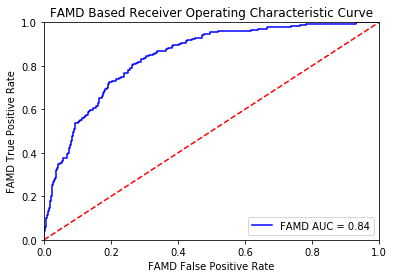

In [286]:
plt.title('FAMD Based Receiver Operating Characteristic Curve')
plt.plot(famd_false_positive_rate, famd_true_positive_rate, 'blue',
         label = 'FAMD AUC = %0.2f' % famd_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('FAMD True Positive Rate')
plt.xlabel('FAMD False Positive Rate')
plt.savefig('Charts/FAMD ROC AUC.svg')
plt.show()

In [287]:
df.to_csv("Cleaned Data.csv", index = False)

# <a name = "conclusions"></a> Conclusions

The biggest issue is with customers with FiberOpticService. It is over twice as influential on the probability of churn than the second highest, DSLService. The combination of these two show that the Internet services of this telecommunications business are the areas that need the most attention. Beyond that, customers that pay for Streaming Movies, and TV based on correlation that caused an interaction requiring the second to be removed from the model, are at the next highest risk of churn. Finally, customers enrolled in paperless billing, senior citizens, and customers with multiple phone lines are also groups to pay attention to.

Ways to continue this analysis:
* Look into the effect on the logistic model of a new boolean column that is True in the rows where there is a positive difference in Tenure * MonthlyCharges and TotalCharges. This may represent a fine, fee, or other superfluous bill, which are all things that customers would consider suddenly ceasing business over. This may more strongly affect those with a lower tenure who haven't established a status quo to overcome.
* [This plot](#potential_svm) has a very interesting projection and may indicate that a SVM-based approach to predict customer churn may be quite effective.
* A 3 dimensional plot of the cleaned [MCA plot here](#MCA_plot) would add another dimension with the 3rd largest eigenvector and add its additional 8.51% inertia. It could be worth inspecting how this 3rd dimension affects the perceived clusters of columns and their values, and seeing if the conclusions would affect any column reduction choices that were too close to call from the other measures.